#REVISÃO DE TODAS AS AULAS APÓS A PF

## Índice :

>[AULA 10 - PARALELISMO](#scrollTo=XNTT1vU_qIS8)

>[AULA 11 - Scheduling e Efeitos Colaterais](#scrollTo=Fszm8Q1Udii5)

>[AULA 12 - Efeitos colaterais II](#scrollTo=_nuH9BT8y8sy)

>[AULA 13 e 14 - Introdução a GPU e Iteradores](#scrollTo=wOs2F6FC1Dc7)

>[AULA 15 - Thrust - Operações customizadas](#scrollTo=U9sOGCBe3JVR)

>[AULA 16 - Introdução a MPI (MESSAGE PASSING INTERFACE)](#scrollTo=Gnef8tuUekM4)

>[AULA 17 - OPERAÇÕES DE REDUÇÃO EM MPI](#scrollTo=a5QORM3xuqFx)

>[AULA 18 - MPI BROADCASTING](#scrollTo=Q4LI2GQOYlgQ)


#AULA 10 - PARALELISMO  

Soluções de alto desempenho

● (1) Algoritmos eficientes

● (2) Implementação eficiente (cache, por
exemplo - como fizemos com a matriz dinâmica implementada na prova)

● (3) Paralelismo

Até então não tínhamos feito o 3.

**Paralelismo**

Consiste no uso de múltiplos
processadores, simultaneamente, para
resolver um problema.

- Tem por objetivo o aumento do
desempenho, i.e., a redução do tempo
necessário para resolver um problema

E ele é normalmente usado por dois motivos:

- (1) Problemas cada vez mais complexos
e/ou maiores
-  (2) Clock dos processadores se
aproximando dos limites ditados pela
física


● **Paralelismo de dados:** a mesma
operação
(lenta)
é executada para
todos os elementos de um conjunto
de dados (grande
)

● **Paralelismo de tarefas:** duas ou
mais tarefas independentes são
executadas em paralelo. Se houver
dependências, quebramos o
problema em partes independents e
rodamos na ordem adequada


**Paralelismo - Resumo**

1. Paralelizar significa rodar código sem dependências simultaneamente
2. Paralelismo de dados: mesma tarefas, dados diferentes
3. Paralelismo de tarefas: heterogêneo
4. Existem tarefas inerentemente sequenciais
5. Ganhos são limitados a partes do programa

**Taxonomia de Flynn**

A taxonomia de Flynn é uma forma de classificar computadores paralelos, ou seja, computadores que podem executar várias tarefas simultaneamente. Foi proposta por Michael Flynn em 1972 e é amplamente utilizada para descrever a arquitetura e o funcionamento desses sistemas.

A taxonomia de Flynn se baseia na ideia de que um computador executa uma sequência de instruções sobre uma sequência de dados. Ela divide os computadores paralelos em quatro categorias principais, com base na presença ou ausência de instruções e dados múltiplos:

1. SISD (Single Instruction, Single Data): Nessa categoria, o computador executa uma única instrução em um único conjunto de dados por vez. É o modelo mais comum em computadores convencionais, onde há uma única unidade de processamento (CPU) executando uma sequência de instruções em um único dado por vez.

2. SIMD (Single Instruction, Multiple Data): Nessa categoria, o computador executa a mesma instrução em vários conjuntos de dados ao mesmo tempo. Isso é comumente encontrado em processadores vetoriais e GPUs (unidades de processamento gráfico), onde uma única instrução é aplicada a elementos de dados múltiplos em paralelo.

3. MISD (Multiple Instruction, Single Data): Nessa categoria, o computador executa várias instruções diferentes em um único conjunto de dados. Embora seja menos comum em sistemas reais, é um modelo teórico que pode ser utilizado em casos específicos, como na verificação de erros em sistemas críticos.

4. MIMD (Multiple Instruction, Multiple Data): Nessa categoria, o computador pode executar instruções diferentes em conjuntos de dados diferentes ao mesmo tempo. É o modelo mais flexível e comumente encontrado em computadores paralelos, onde várias unidades de processamento independentes podem executar tarefas diferentes simultaneamente.

Essa taxonomia fornece uma maneira simples de classificar e entender as arquiteturas de computadores paralelos, permitindo uma melhor compreensão de como os sistemas podem processar informações de forma eficiente por meio da execução simultânea de instruções e dados.


**Multicore: UMA e Non-UMA**

**Sistemas Multicore:**
Um sistema multicore é aquele que possui múltiplos núcleos de processamento em um único chip. Cada núcleo é como uma pequena "unidade de processamento" dentro do chip, capaz de executar instruções e lidar com dados independentemente dos outros núcleos. Imagine que você está trabalhando em um projeto escolar com um colega. Se vocês tiverem apenas um lápis e um caderno, terão que esperar um pelo outro para fazer as tarefas. Agora, se cada um de vocês tiver seu próprio lápis e caderno, poderão trabalhar simultaneamente e completar as tarefas mais rapidamente. Da mesma forma, em um sistema multicore, cada núcleo tem seus próprios recursos de processamento, permitindo que diferentes tarefas sejam executadas ao mesmo tempo, aumentando assim a capacidade de processamento do sistema.

**Uniform Memory Access (Acesso Uniforme à Memória):**
No contexto de sistemas multicore, o Uniform Memory Access (UMA) refere-se a um design em que todos os núcleos têm acesso igual e uniforme a uma única memória compartilhada. É como se todos os núcleos pudessem acessar a mesma biblioteca, com o mesmo tempo de acesso, para pegar os livros que precisam. Isso significa que, independentemente de qual núcleo esteja executando uma determinada tarefa, todos eles podem acessar a memória principal com a mesma latência (tempo de acesso). Isso facilita a comunicação e o compartilhamento de dados entre os núcleos, tornando o acesso à memória previsível e equitativo.

**Non-Uniform Memory Access (Acesso Não Uniforme à Memória):**
No caso do Non-Uniform Memory Access (NUMA), o sistema possui várias memórias locais, cada uma associada a um grupo específico de núcleos. É como se cada grupo de núcleos tivesse sua própria biblioteca local, com acesso rápido e direto aos livros nessa biblioteca. No entanto, se um núcleo de um grupo precisar acessar a memória de outro grupo, ele terá que fazer um "empréstimo" e aguardar um pouco mais de tempo para obter os dados necessários. Essa diferença de latência ocorre porque a memória está fisicamente mais próxima dos núcleos dentro de cada grupo do que dos núcleos de outros grupos. Portanto, o tempo de acesso à memória pode variar dependendo de qual núcleo está fazendo a solicitação e qual memória está sendo acessada.

Em resumo, o sistema multicore envolve a presença de vários núcleos de processamento em um único chip, permitindo a execução simultânea de várias tarefas. O acesso uniforme à memória (UMA) garante que todos os núcleos tenham a mesma latência de acesso à memória compartilhada. Já o acesso não uniforme à memória (NUMA) divide o sistema em grupos de núcleos com memórias locais distintas, resultando em diferenças de latência entre os núcleos que acessam memórias diferentes.

**Dependência**
- É quando uma iteração depende de
resultados calculados em iterações
anteriores
- Quando não existe nenhuma dependência
em um loop, por exemplo, dizemos que
ele é ingenuamente paralelizável



 **OpenMP**
 
● Conjunto de extensões para C/C++ e Fortran

● Fornece construções que permitem paralelizar código em ambientes
multi-core

● Padroniza práticas SMP + SIMD + sistemas heterogêneos (GPU/FPGA)

● Idealmente funciona com o mínimo de modificações no código
sequência

Sintaxe:

- Incluir:

``` cpp
#include <omp.h>
```

- Retorna o identificador da thread:

``` cpp
int_omp_get_thread_num();
```
- Indica o número de threads para executar na região paralela:

``` cpp
void omp_set_num_threads(int num_threads);
```
- Retorna o número de threads que estão executando no momento:

``` cpp
int omp_get_num_threads();
```

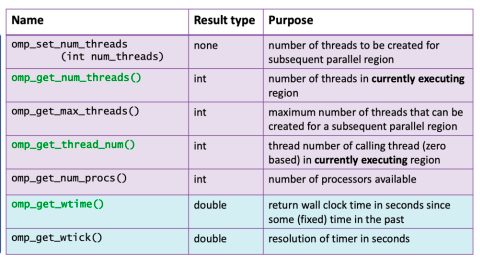

- Cria a região paralela e define as variáveis privadas e compartilhadas entre as threads.

``` cpp
#pragma omp parallel private(...) shared(...)
{

  // Apenas a thread mais rápida
  #pragma omp single
}
```


- Exemplo de código sequencial paralelizado por omp:

``` cpp 

// sequencial
for (int i = 0; i < N; i++){
  a[i] = a[i] + b[i];
}

// paralelizado
#pragma omp parallel
{
  int id, i, Nthreads, istart, iend;
  id = omp_get_thread_num();
  Nthreads = omp_get_num_threads();
  istart = id*N/N_threads;
  iend = (id+1)*N/Nthreads;
  if (id == Nthreads - 1) {
    iend = N;
  }
  for (i = istart; i < iend; i++){
    a[i] = a[i] + b[i]
  }
}

//também podemos ter:

#pragma omp parallel
#pragma omp for
for (i = 0; i < N; i++){
  a[i] = a[i] + b[i];
}

```

Cálculo do PI por meio de uma série infinita de Leibniz¶
Você sabia que é possível calcular o valor do PI por meio de uma série infinita de Leibniz? Veja abaixo:

![Leibniz Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Clarge%20%5Csum_%7Bn%3D0%7D%5E%7B%5Cinfty%7D%20%5Cfrac%7B%28-1%29%5En%7D%7B2n+1%7D%20%3D%20%5Cfrac%7B%5Cpi%7D%7B4%7D)

Sua tarefa

Implemente a versão serial do cálculo do PI a partir da série infinita de Leibniz. Faça n = 1000000000.

Após implementar a versão serial e calcular o tempo de sua execução, implemente a versão em openmp. Você deve fazer sua implementação de duas formas:

a) A primeira implementação você deve trabalhar com 2 threads e a partir do id da thread, você deve dividir a soma em duas partes, cada thread executando a sua porção.

b) A segunda implementação você deve trabalhar com for do openmp e tratar como uma redução do valor de PI. Calcule o tempo de execução.

In [ ]:
%%writefile pi.cpp
#include <iostream>
#include <unistd.h>
#include <omp.h>
#include <chrono>

double calcula_pi(int n){
  double soma = 0;
  int multiplicador = -1;

  #pragma omp parallel for num_threads(4) reduction(+ : soma)
  for (int i = 0; i < n; i++){
    //soma+= pow(-1, i)/(2*i + 1);// para que ficar fazendo pow toda hora se é só fazer - par 1 ou - impar -1
    multiplicador *= -1;
    soma+= (double) multiplicador/(2*i + 1);  // fazer isso pra unidade de processamento não utilizar o ponto flutuante
  }

  // ouuuu
  // if (i%2 == 0){
  //     soma+= 1/(2*i + 1);
  // }else{
  //     soma+= -1/(2*i + 1);
  // }

  return soma*4;
}


int main(){
    auto t_start = std::chrono::high_resolution_clock::now();
    long int n = 10000000000;
    double pi = calcula_pi(n);
    std::cout << "Pi = " << pi << std::endl;

    int nthreads = omp_get_max_threads(); // vê todas as que tem disponíveis 
    std::cout << "Número de threads: " <<  nthreads << std::endl;

    auto t_end = std::chrono::high_resolution_clock::now();

    double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
    double elapsed_time_s = elapsed_time_ms/1000;
    std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;


}

Overwriting pi.cpp


In [ ]:
!g++ -g -Wall -fopenmp pi.cpp -o pi

In [ ]:
!./pi

Pi = 3.14232
Número de threads: 2
Tempo de execução: 12.4192 s


**Tasks (tarefas) em OpenMP**

Vamos agora criar tarefas que podem ser executadas em paralelo.

**Definição**

Uma tarefa é um bloco de código que é rodado de maneira paralela usando OpenMP. Tarefas são agendadas para cada uma das threads criadas em um região paralela. Não existe uma associação 1-1 entre threads e tarefas. Posso ter mais tarefas que threads e mais threads que tarefas.

Veja abaixo um exemplo de criação de tarefas.


```
#pragma omp parallel
{
    #pragma omp task
    {
        std::cout << "Estou rodando na tarefa " << omp_get_thread_num() << "\n";
    }
}
std::cout << "eu só rodo quanto TODAS tarefas acabarem.\n";
```

In [ ]:
%%writefile exemplo.cpp
#include <iostream>
#include <unistd.h>
#include <omp.h>
#include <chrono>

int main(){
  omp_set_num_threads(4);
  # pragma omp parallel
  {
      #pragma omp task
      {
          std::cout << "Estou rodando na tarefa " << omp_get_thread_num() << "\n";
      }
  }
  std::cout << "eu só rodo quanto TODAS tarefas acabarem.\n";

  return 0;
}

Overwriting exemplo.cpp


In [ ]:
!g++ -g -Wall -fopenmp exemplo.cpp -o exemplo

In [ ]:
!./exemplo

Estou rodando na tarefa 0
Estou rodando na tarefa 3
Estou rodando na tarefa 2
Estou rodando na tarefa 1
eu só rodo quanto TODAS tarefas acabarem.



### **Questão 1**

O exemplo acima cria quantas tarefas, supondo que OMP_NUM_THREADS=4?

**R:** 4, uma para cada thread. Como cada thread roda o código da região paralela, cada uma cria exatamente um tarefa.

Para controlar a criação de tarefas em geral usamos a diretiva master, que executa somente na thread de índice 0. Assim conseguimos criar código legível e que deixa bem claro quantas e quais tarefas são criadas.

In [ ]:
%%writefile exemplo2.cpp
#include <iostream>
#include <unistd.h>
#include <omp.h>
#include <chrono>

int main(){
  omp_set_num_threads(4);
  #pragma omp parallel
  {
      #pragma omp master
      {
          std::cout << "só roda uma vez na thread:" << omp_get_thread_num() << "\n";
          #pragma omp task
          {
              std::cout << "Estou rodando na thread:" << omp_get_thread_num() << "\n";
          }
      }
  }
  return 0;
}

Writing exemplo2.cpp


In [ ]:
!g++ -g -Wall -fopenmp exemplo2.cpp -o exemplo2

In [ ]:
!./exemplo2

só roda uma vez na thread:0
Estou rodando na thread:0



### **Questão 2**

Quantas tarefas são criadas no exemplo acima?

**R:** 1


###**Questão 3**

A(s) tarefa(s) criada(s) roda(m) em qual thread?

**R:** Impossível dizer. Em cada execução rodará em uma thread diferente.

## **Questão 4**

Complete exercicio1.cpp criando duas tarefas. A primeira deverá rodar funcao1 e a segunda funcao2. Salve seus resultados nas variáveis indicadas no código.

In [ ]:
%%writefile exercicio1_paralelo.cpp
#include <iostream>
#include <unistd.h>
#include <omp.h>
#include <chrono>

double funcao1() {
    sleep(4);
    return 47;
}

double funcao2() {
    sleep(1);
    return -11.5;
}

int main() {
    auto t_start = std::chrono::high_resolution_clock::now();

    double res_func1, res_func2;

    # pragma omp parallel
    {
        #pragma omp task
        {
            std::cout << "Estou rodando na tarefa " << omp_get_thread_num() << "\n";
            res_func1 = funcao1();
        }

        #pragma omp task
        {
          res_func2 = funcao2();
        }
    }

    //res_func1 = funcao1();
    //res_func2 = funcao2();

    std::cout << res_func1 << " " << res_func2 << "\n";

    auto t_end = std::chrono::high_resolution_clock::now();

    double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
    double elapsed_time_s = elapsed_time_ms/1000;
    std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;

}

Writing exercicio1_paralelo.cpp


In [ ]:
!g++ -g -Wall -fopenmp exercicio1_paralelo.cpp -o exercicio1_paralelo

In [ ]:
!./exercicio1_paralelo

Estou rodando na tarefa 0
Estou rodando na tarefa 1
47 -11.5
Tempo de execução: 5.00062 s


In [ ]:
%%writefile exercicio1_sequencial.cpp
#include <iostream>
#include <unistd.h>
#include <chrono>

double funcao1() {
    sleep(4);
    return 47;
}

double funcao2() {
    sleep(1);
    return -11.5;
}

int main() {
    auto t_start = std::chrono::high_resolution_clock::now();

    double res_func1, res_func2;

    res_func1 = funcao1();
    res_func2 = funcao2();

    std::cout << res_func1 << " " << res_func2 << "\n";

    auto t_end = std::chrono::high_resolution_clock::now();

    double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
    double elapsed_time_s = elapsed_time_ms/1000;
    std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;

}

Writing exercicio1_sequencial.cpp


In [ ]:
!g++ -g -Wall -fopenmp exercicio1_sequencial.cpp -o exercicio1_sequencial

In [ ]:
!./exercicio1_sequencial

47 -11.5
Tempo de execução: 5.00037 s


### **Questão 5**

Leia o código e responda. Quanto tempo o código sequencial demora? E o paralelo? Verifique que sua implementação está de acordo com suas expectativas.

**R:** Sequencial demora a soma dos tempos das duas funções. Paralelo demora o tempo da maior delas.

<a id="second-bullet"></a>
# **AULA 11 - Scheduling e Efeitos Colaterais** 

**Revisitando Parallel for, tasks e sections**

Agora que já conseguimos resolver problemas simples usando três abordagens diferentes, vamos aumentar a complexidade dos problemas tratados. Vimos três abordagens

- parallel for - útil para quando precisamos executar a mesma operação em um conjunto grande de dados.
- tasks - útil para paralelizar tarefas heterogêneas.
- sections - permite paralelizar tarefas heterogênas, com o controle adicional que uma section é executada apenas por uma thread.

Teremos então dois desafios relacionados a paralelizar programas que não são obviamente paralelizáveis.

### **Cálculo do pi recursivo**

Vamos iniciar com um código recursivo para cálculo do pi.

Example

Examine o código em `pi_recursivo.cpp`. Procure entender bem o que está acontecendo antes de prosseguir.

``` cpp

#include <omp.h>
#include <iostream>
#include <iomanip>
static long num_steps = 1024l*1024*1024*2;

#define MIN_BLK  1024*1024*256

double sum = 0;

void pi_r(long Nstart, long Nfinish, double step) {
    long i,iblk;
    if (Nfinish-Nstart < MIN_BLK){
        for (i = Nstart; i < Nfinish; i++){
            double x = (i+0.5)*step;
            sum += 4.0/(1.0+x*x); 
        }
    } else {
        iblk = Nfinish-Nstart;
        pi_r(Nstart,         Nfinish-iblk/2,step);
        pi_r(Nfinish-iblk/2, Nfinish,       step);
    }
}

int main () {
    long i;
    double step, pi;
    double init_time, final_time;
    step = 1.0/(double) num_steps;
    init_time = omp_get_wtime();
    pi_r(0, num_steps, step);
    pi = step * sum;
    final_time = omp_get_wtime() - init_time;

    std::cout << "for " << num_steps << " steps pi = " << std::setprecision(15) << pi << " in " << final_time << " secs\n";
}

```


### **Question 1**

Onde estão as oportunidades de paralelismo? O código tem dependências?

**R:** As oportunidades de paralelismo estão nas iterações do loop dentro da função pi_r. Cada iteração do loop é independente das outras, pois calcula uma contribuição separada para a variável sum. Portanto, é possível executar essas iterações em paralelo.

### **Question 2**

Se o código tiver dependências, é possível refatorá-lo para eliminá-las?

**R:** O código não tem dependências entre as iterações do loop, portanto, não é necessário refatorá-lo para eliminar dependências.

### **Question 3**

Quantas níveis de chamadas recursivas são feitas? Quando o programa para de chamar recursivamente e faz sequencial?

**R:** O código faz chamadas recursivas dividindo o intervalo de iterações em blocos menores até atingir um tamanho mínimo especificado pela constante MIN_BLK. A quantidade de níveis de chamadas recursivas depende do valor de num_steps e do tamanho mínimo de bloco definido por MIN_BLK.

No caso do código fornecido, as chamadas recursivas são feitas até que o tamanho do intervalo de iterações seja menor que MIN_BLK. Quando isso ocorre, as iterações restantes são calculadas sequencialmente dentro do loop principal.

A quantidade exata de níveis de chamadas recursivas depende do valor de num_steps e da relação entre num_steps e MIN_BLK.


Vamos agora tentar paralelizar o programa usando as duas técnicas.

### **Usando for paralelo**

In [ ]:
%%writefile pi_recursivo_sequencial.cpp
# include <omp.h>
# include <iostream>
# include <iomanip>
static long num_steps = 1024l*1024*1024*2;

# define MIN_BLK  1024*1024*256

double sum = 0;

void pi_r(long Nstart, long Nfinish, double step) {
    long i,iblk;
    if (Nfinish-Nstart < MIN_BLK){
        for (i = Nstart; i < Nfinish; i++){
            double x = (i+0.5)*step;
            sum += 4.0/(1.0+x*x); 
        }
    } else {
        iblk = Nfinish-Nstart;
        pi_r(Nstart,         Nfinish-iblk/2,step);
        pi_r(Nfinish-iblk/2, Nfinish,       step);
    }
}

int main () {
    long i;
    double step, pi;
    double init_time, final_time;
    step = 1.0/(double) num_steps;
    init_time = omp_get_wtime();
    pi_r(0, num_steps, step);
    pi = step * sum;
    final_time = omp_get_wtime() - init_time;

    std::cout << "for " << num_steps << " steps pi = " << std::setprecision(15) << pi << " in " << final_time << " secs\n";
}

Overwriting pi_recursivo_sequencial.cpp


In [ ]:
!g++ -Wall -fopenmp pi_recursivo_sequencial.cpp -o pi_recursivo_sequencial

pi_recursivo_sequencial.cpp: In function ‘int main()’:
pi_recursivo_sequencial.cpp:25:10: warning: unused variable ‘i’ [-Wunused-variable]
   25 |     long i;
      |          ^


In [ ]:
!./pi_recursivo_sequencial

for 2147483648 steps pi = 3.14159265358977 in 32.7849787740006 secs


In [ ]:
%%writefile pi_recursivo_paralelizado.cpp
# include <omp.h>
# include <iostream>
# include <iomanip>
static long num_steps = 1024l*1024*1024*2;

# define MIN_BLK  1024*1024*256

double sum = 0;

void pi_r(long Nstart, long Nfinish, double step) {
    long i,iblk;
    if (Nfinish-Nstart < MIN_BLK){
        #pragma omp parallel for reduction(+ : sum)
        for (i = Nstart; i < Nfinish; i++){
            double x = (i+0.5)*step;
            sum += 4.0/(1.0+x*x); 
        }
    } else {
        iblk = Nfinish-Nstart;
        pi_r(Nstart,         Nfinish-iblk/2,step);
        pi_r(Nfinish-iblk/2, Nfinish,       step);
    }
}

int main () {
    long i;
    double step, pi;
    double init_time, final_time;
    step = 1.0/(double) num_steps;
    init_time = omp_get_wtime();
    pi_r(0, num_steps, step);
    pi = step * sum;
    final_time = omp_get_wtime() - init_time;

    std::cout << "for " << num_steps << " steps pi = " << std::setprecision(15) << pi << " in " << final_time << " secs\n";
}

Overwriting pi_recursivo_paralelizado.cpp


In [ ]:
!g++ -Wall -fopenmp pi_recursivo_paralelizado.cpp -o pi_recursivo_paralelizado

pi_recursivo_paralelizado.cpp: In function ‘int main()’:
pi_recursivo_paralelizado.cpp:26:10: warning: unused variable ‘i’ [-Wunused-variable]
   26 |     long i;
      |          ^


In [ ]:
!./pi_recursivo_paralelizado

for 2147483648 steps pi = 3.14159265358977 in 18.1960811139998 secs


Quanto ao número MIN_BLK, ele afeta o algoritmo controlando o tamanho mínimo do bloco que será executado sequencialmente. Se o número de iterações em um determinado bloco for menor que MIN_BLK, esse bloco será executado sequencialmente em vez de ser dividido em partes menores para paralelismo. Ajustar o valor de MIN_BLK pode afetar o desempenho do programa dependendo das características da arquitetura e do problema em questão. Experimente ajustar esse valor e medir o desempenho para determinar o melhor valor para o seu caso específico.

### **Usando task**

Agora vamos usar task. Neste caso é vamos adotar a seguinte estratégia: usaremos tarefas para paralelizar as chamadas recursivas feitas em pi_recursivo.cpp.

In [ ]:
%%writefile pi_recursivo_task.cpp
# include <omp.h>
# include <iostream>
# include <iomanip>
static long num_steps = 1024l*1024*1024*2;

# define MIN_BLK  1024*1024*256

double sum = 0;

void pi_r(long Nstart, long Nfinish, double step) {
    long i,iblk;
    if (Nfinish-Nstart < MIN_BLK){
        //#pragma omp parallel for reduction(+ : sum)
        for (i = Nstart; i < Nfinish; i++){
            double x = (i+0.5)*step;
            sum += 4.0/(1.0+x*x); 
        }
    } else {
        // #pragma omp parallel
        // #pragma omp master
        #pragma omp single // vai ser o coordenador das duas execuções
        {
          iblk = Nfinish-Nstart;

          #pragma omp task
          {
                pi_r(Nstart,Nfinish-iblk/2,step);
          }

          # pragma omp task
          {
                pi_r(Nfinish-iblk/2, Nfinish,step);
          }
        }
    }
}

int main () {
    long i;
    double step, pi;
    double init_time, final_time;
    step = 1.0/(double) num_steps;
    init_time = omp_get_wtime();
    pi_r(0, num_steps, step);
    pi = step * sum;
    final_time = omp_get_wtime() - init_time;

    std::cout << "for " << num_steps << " steps pi = " << std::setprecision(15) << pi << " in " << final_time << " secs\n";
}

Overwriting pi_recursivo_task.cpp


In [ ]:
!g++ -Wall -fopenmp pi_recursivo_task.cpp -o pi_recursivo_task

pi_recursivo_task.cpp: In function ‘int main()’:
pi_recursivo_task.cpp:39:10: warning: unused variable ‘i’ [-Wunused-variable]
   39 |     long i;
      |          ^


In [ ]:
!./pi_recursivo_task

for 2147483648 steps pi = 3.14159265358977 in 32.4873357309998 secs


### **MISTURADO**

In [ ]:
%%writefile pi_recursivo_mixed.cpp
# include <omp.h>
# include <iostream>
# include <iomanip>
static long num_steps = 1024l*1024*1024*2;

# define MIN_BLK  1024*1024*256

double sum = 0;

void pi_r(long Nstart, long Nfinish, double step) {
    long i,iblk;
    if (Nfinish-Nstart < MIN_BLK){
        #pragma omp parallel for reduction(+ : sum)
        for (i = Nstart; i < Nfinish; i++){
            double x = (i+0.5)*step;
            sum += 4.0/(1.0+x*x); 
        }
    } else {
        // #pragma omp parallel
        // #pragma omp master
        #pragma omp single // vai ser o coordenador das duas execuções
        {
          iblk = Nfinish-Nstart;

          #pragma omp task
          {
                pi_r(Nstart,Nfinish-iblk/2,step);
          }

          # pragma omp task
          {
                pi_r(Nfinish-iblk/2, Nfinish,step);
          }
        }
    }
}

int main () {
    long i;
    double step, pi;
    double init_time, final_time;
    step = 1.0/(double) num_steps;
    init_time = omp_get_wtime();
    pi_r(0, num_steps, step);
    pi = step * sum;
    final_time = omp_get_wtime() - init_time;

    std::cout << "for " << num_steps << " steps pi = " << std::setprecision(15) << pi << " in " << final_time << " secs\n";
}

Writing pi_recursivo_mixed.cpp


In [ ]:
!g++ -Wall -fopenmp pi_recursivo_mixed.cpp -o pi_recursivo_mixed

pi_recursivo_mixed.cpp: In function ‘int main()’:
pi_recursivo_mixed.cpp:39:10: warning: unused variable ‘i’ [-Wunused-variable]
   39 |     long i;
      |          ^


In [ ]:
!./pi_recursivo_mixed

for 2147483648 steps pi = 3.14159265358977 in 17.939588489 secs


### **Efeitos Colaterais**

Agora que já conseguimos resolver um problema um pouco mais complexo usando abordagens diferentes, vamos aumentar um pouco mais a complexidade dos problemas tratados.

No código pi_recursivo.cpp tínhamos uma variável global que podia ser eliminada do código mudando a função recursiva. Isso, porém, nem sempre é possível e precisamos lidar com estas situações.

### **Um primeiro teste**

Vamos iniciar trabalhando com o seguinte trecho de código (arquivo vetor_insert.cpp):

``` cpp
std::vector<double> vec;
for (int i = 0; i < N; i++) {
    vec.push_back(conta_complexa(i));
}
```

Vamos supor agora que usaremos o seguinte comando para paralelizar o código acima usando OpenMP:

``` cpp
#pragma omp parallel for
```

A variável i é

**R:** private

A variável vec é

**R:** shared

### **Question**

O código paralelizado rodaria sem dar erros? Os resultados seriam os esperados?

Não, o código acima dá erro ao executar.

In [ ]:
%%writefile vetor_insert.cpp

#include <vector>
#include <iostream>
#include <unistd.h>
#include <omp.h>


double conta_complexa(int i) {
	return 2 * i;
}

int main() {
	int N = 10000; 
	std::vector<double> vec;
	#pragma omp parallel for  private(i) shared(vec)
	for (int i = 0; i < N; i++) {
		vec.push_back(conta_complexa(i));
	}
		
	for (int i = 0; i < N; i++) {
		std::cout << vec[i] << " ";
		// std::cout << i << " ";
	}
	
	return 0;
}


// Ao usar a cláusula default(none), o compilador OpenMP exige que todas as variáveis ​​sejam especificadas explicitamente como
//  compartilhadas ou privadas usando as cláusulas shared ou private, respectivamente. Isso ajuda a tornar o código mais seguro e menos
//   suscetível a bugs de concorrência.

Overwriting vetor_insert.cpp


In [ ]:
!g++ -Wall -fopenmp vetor_insert.cpp -o vetor_insert

vetor_insert.cpp: In function ‘int main()’:
vetor_insert.cpp:15:36: error: ‘i’ has not been declared
   15 |  #pragma omp parallel for  private(i) shared(vec)
      |                                    ^


In [ ]:
!./vetor_insert

double free or corruption (!prev)


### **Seções críticas**

Antes de começar, vamos aprender mais um aspecto de OpenMP: diretivas para compartilhamento de dados. Já vimos as 3 principais opções:

- shared - compartilhado entre threads
- private - privados entre threads
- firstprivate - Especifica que cada thread deve ter sua própria instância de uma variável e que a variável deve ser inicializada com o valor da variável antes da seção paralela.

Podemos forçar a especificação de diretivas de compartilhamento para todas as variáveis usadas nas construções omp parallel, omp task e omp parallel for.

**Tip**

Ao adicionarmos default(none) logo após as diretivas acima precisaremos especificar, para cada variável usada, sua diretiva de compartilhamento. Isso torna muito mais fácil identificar casos de compartilhamento indevido de dados.

A partir desse ponto estaremos supondo que todo código criado usará default(none).

A primeira abordagem usada terá a missão de indicar que um conjunto de linhas contém uma operação que possui efeitos colaterais. Dessa maneira, podemos evitar conflitos se só permitirmos que essa região rode em uma thread por vez.

Fazemos isso usando a diretiva omp critical:

``` cpp
#pragma omp critical
{
    // código aqui dentro roda somente em uma thread por vez.
}
```

Se duas threads chegam ao mesmo tempo no bloco critical, uma delas ficará esperando até a outra acabar o bloco. Quando isso ocorrer a thread que esperou poderá prosseguir. Vamos tentar aplicar isso ao código de vetor_insert.cpp.



In [ ]:
%%writefile vetor_insert_critical.cpp

#include <vector>
#include <iostream>
#include <unistd.h>
#include <omp.h>
#include <chrono>


double conta_complexa(int i) {
	return 2 * i;
}

int main() {
  auto t_start = std::chrono::high_resolution_clock::now();

	int N = 10000; 
	std::vector<double> vec;
  int i = 0;
	#pragma omp parallel for default(none) private(i) shared(vec) firstprivate(N)
	for (i = 0; i < N; i++) {
    # pragma omp critical
    {
		  vec.push_back(conta_complexa(i));
    }
	}
		
	for (int i = 0; i < N; i++) {
		std::cout << vec[i] << " ";
		// std::cout << i << " ";
	}

  std::cout << std::endl;
  auto t_end = std::chrono::high_resolution_clock::now();

  double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
  double elapsed_time_s = elapsed_time_ms/1000;
  std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;
	
	return 0;
}


// Ao usar a cláusula default(none), o compilador OpenMP exige que todas as variáveis ​​sejam especificadas explicitamente como
//  compartilhadas ou privadas usando as cláusulas shared ou private, respectivamente. Isso ajuda a tornar o código mais seguro e menos
//   suscetível a bugs de concorrência.

// firstprivate(N) irá definir N como uma variável privada e copiá-la para cada thread.

Overwriting vetor_insert_critical.cpp


In [ ]:
!g++ -Wall -fopenmp vetor_insert_critical.cpp -o vetor_insert_critical

In [ ]:
!./vetor_insert_critical

10000 10002 10004 10006 10008 10010 10012 10014 10016 10018 10020 10022 10024 10026 10028 10030 10032 10034 10036 10038 10040 10042 10044 10046 10048 10050 10052 10054 10056 10058 10060 10062 10064 10066 10068 10070 10072 10074 10076 10078 10080 10082 10084 10086 10088 10090 10092 10094 10096 10098 10100 10102 10104 10106 10108 10110 10112 10114 10116 10118 10120 10122 10124 10126 10128 10130 10132 10134 10136 10138 10140 10142 10144 10146 10148 10150 10152 10154 10156 10158 10160 10162 10164 10166 10168 10170 10172 10174 10176 10178 10180 10182 10184 10186 10188 10190 10192 10194 10196 10198 10200 10202 10204 10206 10208 10210 10212 10214 10216 10218 10220 10222 10224 10226 10228 10230 10232 10234 10236 10238 10240 10242 10244 10246 10248 10250 10252 10254 10256 10258 10260 10262 10264 10266 10268 10270 10272 10274 10276 10278 10280 10282 10284 10286 10288 10290 10292 10294 10296 10298 10300 10302 10304 10306 10308 10310 10312 10314 10316 10318 10320 10322 10324 10326 10328 10330 1033

Se sua implementação se parecer com o código abaixo, então é bem provável que a versão paralela na verdade tenha demorado o mesmo tempo ou mais que o original.

```cpp
#pragma omp parallel for default(none) shared(vec)
for (int i = 0; i < N; i++) {
    #pragma omp critical
    {
        vec.push_back(conta_complexa(i));
    }
}
```

Analise o código novamente e tente explicar por que o programa não ganhou velocidade.

Resposta:

A operação que produz efeitos colaterais é vec.push_back, mas nossa seção crítica envolve também a chamada conta_complexa(i).

Example

Modifique seu código de acordo com a resposta acima. Meça o desempenho e veja que agora há melhora.

In [ ]:
%%writefile vetor_insert_sequencial.cpp

#include <vector>
#include <iostream>
#include <unistd.h>
#include <omp.h>
#include <chrono>

double conta_complexa(int i) {
	return 2 * i;
}

int main() {
  auto t_start = std::chrono::high_resolution_clock::now();

	int N = 10000; 
	std::vector<double> vec;
	for (int i = 0; i < N; i++) {
		vec.push_back(conta_complexa(i));
	}
		
	for (int i = 0; i < N; i++) {
		std::cout << vec[i] << " ";
		// std::cout << i << " ";
	}

  std::cout << std::endl;

  auto t_end = std::chrono::high_resolution_clock::now();

  double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
  double elapsed_time_s = elapsed_time_ms/1000;
  std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;
	
  
	return 0;
}



Overwriting vetor_insert_sequencial.cpp


In [ ]:
!g++ -Wall -fopenmp vetor_insert_sequencial.cpp -o vetor_insert_sequencial

In [ ]:
!./vetor_insert_sequencial

0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98 100 102 104 106 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286 288 290 292 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358 360 362 364 366 368 370 372 374 376 378 380 382 384 386 388 390 392 394 396 398 400 402 404 406 408 410 412 414 416 418 420 422 424 426 428 430 432 434 436 438 440 442 444 446 448 450 452 454 456 458 460 462 464 466 468 470 472 474 476 478 480 482 484 486 488 490 492 494 496 498 500 502 504 506 508 510 512 514 516 518 520 522 524 526

In [ ]:
%%writefile vetor_insert_critical_melhor.cpp

#include <vector>
#include <iostream>
#include <unistd.h>
#include <omp.h>
#include <chrono>


double conta_complexa(int i) {
	return 2 * i;
}

int main() {
  auto t_start = std::chrono::high_resolution_clock::now();
	int N = 10000; 
	std::vector<double> vec;
  int i = 0;
	#pragma omp parallel for default(none) private(i) shared(vec) firstprivate(N)
	for (i = 0; i < N; i++) {
    double calculo = conta_complexa(i);
    # pragma omp critical
    {
		  vec.push_back(calculo);
    }
	}
		
	for (int i = 0; i < N; i++) {
		std::cout << vec[i] << " ";
		// std::cout << i << " ";
	}

  std::cout << std::endl;
  auto t_end = std::chrono::high_resolution_clock::now();

  double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
  double elapsed_time_s = elapsed_time_ms/1000;
  std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;
	
	return 0;
}


// Ao usar a cláusula default(none), o compilador OpenMP exige que todas as variáveis ​​sejam especificadas explicitamente como
//  compartilhadas ou privadas usando as cláusulas shared ou private, respectivamente. Isso ajuda a tornar o código mais seguro e menos
//   suscetível a bugs de concorrência.

// firstprivate(N) irá definir N como uma variável privada e copiá-la para cada thread.

Overwriting vetor_insert_critical_melhor.cpp


In [ ]:
!g++ -Wall -fopenmp vetor_insert_critical_melhor.cpp -o vetor_insert_critical_melhor

In [ ]:
!./vetor_insert_critical_melhor

10000 10002 10004 10006 10008 10010 10012 10014 10016 10018 10020 10022 10024 10026 10028 10030 10032 10034 10036 10038 10040 10042 10044 10046 10048 10050 10052 10054 10056 10058 10060 10062 10064 10066 10068 10070 10072 10074 10076 10078 10080 10082 10084 10086 10088 10090 10092 10094 10096 10098 10100 10102 10104 10106 10108 10110 10112 10114 10116 10118 10120 10122 10124 10126 10128 10130 10132 10134 10136 10138 10140 10142 10144 10146 10148 10150 10152 10154 10156 10158 10160 10162 10164 10166 10168 10170 10172 10174 10176 10178 10180 10182 10184 10186 10188 10190 10192 10194 10196 10198 10200 10202 10204 10206 10208 10210 10212 10214 10216 10218 10220 10222 10224 10226 10228 10230 10232 10234 10236 10238 10240 10242 10244 10246 10248 10250 10252 10254 10256 10258 10260 10262 10264 10266 10268 10270 10272 10274 10276 10278 10280 10282 10284 10286 10288 10290 10292 10294 10296 10298 10300 10302 10304 10306 10308 10310 10312 10314 10316 10318 10320 10322 10324 10326 10328 10330 1033

### **Question**

A ordem se mantém igual ao programa sequencial? Você consegue explicar por que?

**Resposta**

Não se mantém. Cada thread chega ao push_back em um momento diferente, logo a ordem em que os dados são adicionados no vetor muda.


### **Manejo de conflitos usando pré-alocação de memória**

Seções críticas são muito úteis quando não conseguimos evitar o compartilhamento de dados. Porém, elas são caras e e feitas especialmente para situações em que região crítica é pequena e chamada um número relativamente pequeno de vezes.

Como regra, desejamos entrar na região crítica o menor número possível de vezes.

### **Question**

Reveja o código do inicial da seção de efeitos colaterais. Seria possível reescrevê-lo para não usar push_back?

**Resposta**

Sim, bastaria alocar o vetor com tamanho N ao criá-lo. Assim poderíamos atribuir conta_complexa direto para a posição de memória desejada.

A estratégia acima é muito importante em alto desempenho e representa uma maneira de evitar seções críticas e sincronização.

É sempre melhor alocar memória em blocos grandes antes do paralelismo do que alocar memória frequentemente dentro de regiões paralelas.

Note que fizemos isso na parte de tarefas: ao criarmos variáveis para cada tarefa preencher evitamos a necessidade de usar sincronização.


**Example**

Modifique o programa para usar a ideia da questão anterior. Meça o desempenho e verifique que tudo funciona normalmente e mais rápido que o original.

In [ ]:
%%writefile vetor_insert_sem_pushback.cpp
#include <vector>
#include <iostream>
#include <unistd.h>
#include <omp.h>
#include <chrono>

double conta_complexa(int i) {
    return 2 * i;
}

int main() {
    auto t_start = std::chrono::high_resolution_clock::now();

    int N = 10000;
    std::vector<double> vec(N);

    #pragma omp parallel for
    for (int i = 0; i < N; i++) {
        vec[i] = conta_complexa(i);
    }

    for (int i = 0; i < N; i++) {
        std::cout << vec[i] << " ";
    }

    std::cout << std::endl;
    auto t_end = std::chrono::high_resolution_clock::now();

    double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end - t_start).count();
    double elapsed_time_s = elapsed_time_ms / 1000;
    std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;

    return 0;
}


Overwriting vetor_insert_sem_pushback.cpp


In [ ]:
!g++ -Wall -fopenmp vetor_insert_sem_pushback.cpp -o vetor_insert_sem_pushback

In [ ]:
!./vetor_insert_sem_pushback

0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98 100 102 104 106 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286 288 290 292 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358 360 362 364 366 368 370 372 374 376 378 380 382 384 386 388 390 392 394 396 398 400 402 404 406 408 410 412 414 416 418 420 422 424 426 428 430 432 434 436 438 440 442 444 446 448 450 452 454 456 458 460 462 464 466 468 470 472 474 476 478 480 482 484 486 488 490 492 494 496 498 500 502 504 506 508 510 512 514 516 518 520 522 524 526

## **AULA 12 - Efeitos colaterais II**

Na aula de hoje iremos trabalhar com um algoritmo de sorteios aleatórios para calcular o pi. Ele é baseado em uma técnica de Otimização, Simulação e Estimação Paramétrica chamada Monte Carlo.

O algoritmo sequencial se baseia em sorteios de pontos dentro de um quadrado de lado 2. Se a distância entre o ponto e o centro do quadrado for menor que 1 então o ponto cai dentro do círculo inscrito no quadrado. A quantidade de pontos que caem dentro do quadrado é proporcional a π
. Veja abaixo um resumo do algoritmo.

```
sum = 0
De i=0 até N:
  a.sorteie pontos x,y ∈[0,1]
  b.se x**2+y**2≤1, sum += 1
devolva 4 * sum / N
```

Gerar números aleatórios é um processo sequencial, vamos considerar o quanto isso atrapalha nosso programa. Nas próximas questões leve em conta que o gerador de números aleatórios é uma variável compartilhada.


In [ ]:
%%writefile monte-carlo.cpp
#include <iostream>
#include <stdlib.h>
#include <omp.h>
#include <chrono>
#include <random>
using namespace std;


int main(){
    auto t_start = std::chrono::high_resolution_clock::now();
    double sum = 0;
    int N = 100000;

    // faça um gerador de numeros aleatorios que vai de 0 a 1


    std::default_random_engine generator(42);
    std::uniform_real_distribution<double> distribution(0.0, 1.0);


    #pragma omp parallel for num_threads(4) reduction(+ : sum)
    for (int i = 0; i < N; i++){
        double x = (double) distribution(generator);
        double y = (double) distribution(generator);
        if (x*x + y*y <= 1){
            sum += 1;
        }
    }
    cout << 4 * sum / N << endl;

    auto t_end = std::chrono::high_resolution_clock::now();

    double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
    double elapsed_time_s = elapsed_time_ms/1000;
    std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;

    return 4 * sum / N;
}

Writing monte-carlo.cpp


In [ ]:
%%writefile monte-carlo-tentativa1.cpp
#include <iostream>
#include <stdlib.h>
#include <omp.h>
#include <chrono>
#include <random>
using namespace std;


int main(){
    auto t_start = std::chrono::high_resolution_clock::now();
    double sum = 0;
    int N = 100000;

    // faça um gerador de numeros aleatorios que vai de 0 a 1


    #pragma omp parallel for num_threads(4) reduction(+ : sum)
    for (int i = 0; i < N; i++){
        std::default_random_engine generator(i);
        std::uniform_real_distribution<double> distribution(0.0, 1.0);

        double x = (double) distribution(generator);
        double y = (double) distribution(generator);
        if (x*x + y*y <= 1){
            sum += 1;
        }
    }
    cout << 4 * sum / N << endl;

    auto t_end = std::chrono::high_resolution_clock::now();

    double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
    double elapsed_time_s = elapsed_time_ms/1000;
    std::cout << "Tempo de execução: " << elapsed_time_s << " s" << std::endl;

    return 4 * sum / N;
}

Writing monte-carlo-tentativa1.cpp


In [ ]:
!g++ -Wall -fopenmp monte-carlo-tentativa1.cpp -o monte-carlo-tentativa1

In [ ]:
!./monte-carlo-tentativa1

3.14104
Tempo de execução: 0.0218027 s


In [ ]:
%%writefile monte-carlo-tentativa2.cpp
#include <iostream>
#include <stdlib.h>
#include <omp.h>
#include <chrono>
#include <random>
#include <iomanip>

using namespace std;


int main(){
    auto t_start = std::chrono::high_resolution_clock::now();
    double pi_estimate = 0.0;
    long int N = 100000;

    // faça um gerador de numeros aleatorios que vai de 0 a 1


    #pragma omp parallel for num_threads(4) reduction(+ : pi_estimate) 
    for (int i = 0; i < N; i++){
        int num_threads = omp_get_num_threads();
        int tid = omp_get_thread_num();

        std::default_random_engine generator(tid*rand());
        std::normal_distribution<double> distribution(0.0, 0.5);        

        double x = (double) distribution(generator);
        double y = (double) distribution(generator);

        // cout << "x: " << x << " y: " << y << endl;

        if (x*x + y*y <= 1){
            pi_estimate += 1.0;
        }
    }
    

    cout << pi_estimate << endl;

    cout << "PI " << std::setprecision(6.4) << 4.0 * pi_estimate / (double) N << endl;


    auto t_end = std::chrono::high_resolution_clock::now();

    double elapsed_time_ms = std::chrono::duration<double, std::milli>(t_end-t_start).count();
    double elapsed_time_s = elapsed_time_ms/1000;
    std::cout << "Tempo de execução mudei: " << elapsed_time_s << " s" << std::endl;

    return 0;
}

Overwriting monte-carlo-tentativa2.cpp


In [ ]:
!g++ -Wall -fopenmp monte-carlo-tentativa2.cpp -o monte-carlo-tentativa2

monte-carlo-tentativa2.cpp: In function ‘int main()’:
monte-carlo-tentativa2.cpp:21:13: warning: unused variable ‘num_threads’ [-Wunused-variable]
   21 |         int num_threads = omp_get_num_threads();
      |             ^~~~~~~~~~~


In [ ]:
!./monte-carlo-tentativa2

89733
PI 3.58932
Tempo de execução mudei: 0.034016 s


## **AULA 13 e 14 - Introdução a GPU e Iteradores**

Obs: na aula 13 apenas rodamos um código.

Abaixo, sintaxe do thrust com exemplos:

- Para declarar um vetor de CPU em thrust:

```cpp
  //vetor com 10 elementos e não preenchido
  thrust::host_vector<double> vec_cpu(10);
```

- Para copiar um vetor pra outro:

```cpp
  thrust::host_vector<double> vec_cpu(10);
  thrust::device_vector<double> vec_gpu(vec_cpu);
```

- Para declarar um vetor de GPU em thrust:

```cpp
  // vetor com 5 elementos e todos sendo 0 {0, 0, 0, 0, 0}
  thrust::device_vector<int> vetor(5,0);

  // vetor preenchido todo com 0.1
  // {0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1}
  thrust::device_vector<double> width(11, 0.1);
```

- Para criar uma sequência:

```cpp
  // sequencia de um em um {0, 1, 2, 3, 4}
  thrust::sequence(vetor.begin(), vetor.end());

  //sequencia de 0.1 em 0.1
  // {0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0}
  thrust::sequence(x.begin(), x.end(), 0.0f, 0.01f);
```

- Para preencher os elementos que quiser:

```cpp
  // preenche com o número escolhido o vetor {13, 13, 2, 3, 4}
  thrust::fill(vetor.begin(), vetor.begin()+2, 13);
```

- Transform:

```cpp
   // soma v1 e v2 e guarda resultado em v3
  thrust::transform(v1.begin(), v1.end(), v2.begin(), v3.begin(), thrust::plus<double>());

  // multiplica v1 por 0.5 e guarda em v4
  thrust::transform(v1.begin(), v1.end(), thrust::constant_iterator<double>(0.5), v4.begin(), thrust::multiplies<double>());

  // calcula o quadrado de cada elemento e guarda em height
  thrust::transform(x.begin(), x.end(), height.begin(), thrust::square<double>());

  // se for potencias em geral
  thrust::transform(x.begin(), x.end(), exponent.begin(), result.begin(), thrust::pow<T>());

```

No caso específico das operações de soma, multiplicação, subtração e potência, você pode usar as seguintes funções no Thrust:

Soma: thrust::plus

Multiplicação: thrust::multiplies

Subtração: thrust::minus

Potência: thrust::pow

- Reduce:

```cpp
  val = thrust::reduce(iter_comeco, iter_fim, valor_inicial, operacao); 

  // pode não ter nada, nesse caso assume que o valor_incial é 0 e que a operacao é soma!

  total_area = thrust::reduce(area.begin(), area.end());
```

- Iterators:

```cpp

thrust::device_vector<int> d_vec(4);
thrust::device_vector<int>::iterator begin = d_vec.begin();
thrust::device_vector<int>::iterator end = d_vec.end();

int length = end - begin;
end = d_vec.begin() + 3 // define uma sequencia de 3 eleementos

```

- Constant iterator:

Preenche um array infinito com um valor constante

```cpp

thrust::constant_iterator<int> begin(10); // preenche tudo com 10
thrust::constant_iterator<int> end = begin + 3;

thrust::reduce(begin, end); // vai retornar 30

```  

- Counting Iterator:

Preenche um array infinito com valores sequenciais

```cpp
#include <thrust/counting_iterator.h>
#include <thrust/reduce.h>

thrust::counting_iterator<int> begin(10);
thrust::counting_iterator<int> end = begin + 3;

thrust::reduce(begin, end); // vai retornar 33 (10, 11, 12 )
``` 

- Zip Iterator:

```cpp

thrust::device_vector<int> A(3);
thrust::device_vector<char> B(3);

// suponha que preenchemos com:
// A = {10, 20, 30}
// B = {'x', 'y', 'z'}

//Agora criamos um iterator pro zip:
begin = thrust::make_zip_iterator(thrust::make_tuple(A.begin(), B.begin()));
end = thrust::make_zip_iterator(thrust::make_tuple(A.end(), B.end()));

// Se fizer begin[0] vai retornar tuple(10, 'x')

// Agora, pegando o máximo de begin:

thrust::maximum<tuple<int, char>> binary_op;
thrust::reduce(begin, end, begin[0], binary_op); // vai retornar tuple(30, 'z')
```



-  Sort:

```cpp
#include <thrust/sort.h>

// Ordena em ordem crescente
thrust::sort(sequence.begin(), sequence.end());

// Ordena em ordem decrescente
thrust::sort(sequence.begin(), sequence.end(), thrust::greater<T>());
```
`sequence` é a sequência que você deseja ordenar, e `T` é o tipo dos elementos da sequência.

- Scan:


```cpp
#include <thrust/scan.h>

// Executa uma varredura exclusiva (exclusive scan)
thrust::exclusive_scan(sequence.begin(), sequence.end(), result.begin());

// Executa uma varredura inclusiva (inclusive scan)
thrust::inclusive_scan(sequence.begin(), sequence.end(), result.begin());
```
`sequence` é a sequência de entrada, e `result` é a sequência que armazenará os resultados intermediários da varredura.

- Copy;

```cpp
#include <thrust/copy.h>

thrust::copy(source.begin(), source.end(), destination.begin());
```




In [ ]:
%%writefile variancia.cu
#include <thrust/host_vector.h>
#include <thrust/device_vector.h>
#include <thrust/generate.h>
#include <thrust/sort.h>
#include <thrust/copy.h>
#include <thrust/random.h>
#include <vector>
using namespace std;

int main() {
  thrust::device_vector<double> d_vec(10);
  thrust::sequence (d_vec.begin(), d_vec.end(), 0.0f, 1.0f);

  thrust::device_vector<double>::iterator begin = d_vec.begin();
  thrust::device_vector<double>::iterator end = d_vec.end();
  int len = end - begin;


  double media = thrust::reduce(d_vec.begin(), d_vec.end()) / len;

//   thrust::device_vector<double> media_vector(len, media);

  thrust::constant_iterator<double> media_vector_begin(media);
  thrust::constant_iterator<double> media_vector_end = media_vector_begin + len;

  thrust::device_vector<double> subtracao_vec(len);
  thrust::device_vector<double> quadrado_vec(len);
  thrust::transform (d_vec.begin(), d_vec.end(), media_vector_begin, subtracao_vec.begin(), thrust::minus<double>());
  thrust::transform (subtracao_vec.begin(), subtracao_vec.end(), subtracao_vec.begin(), quadrado_vec.begin(), thrust::multiplies<double>());

  double soma_quadrados = thrust::reduce(quadrado_vec.begin(), quadrado_vec.end());

  double variance = soma_quadrados / len;

  std::cout << "variancia: " << variance << std::endl;
}

Writing variancia.cu


In [ ]:
!nvcc variancia.cu -o variancia

In [ ]:
!./variancia

variancia: 8.25


In [ ]:
%%writefile variancia_correcao.cu
#include <thrust/host_vector.h>
#include <thrust/device_vector.h>
#include <thrust/generate.h>
#include <thrust/sort.h>
#include <thrust/copy.h>
#include <thrust/random.h>
#include <vector>
using namespace std;

int main() {
  int N = 10;
  thrust::device_vector<float> x(N);
  thrust::sequence (x.begin(), x.end());

  //PASSO 1
  float media = thrust::reduce(x.begin(), x.end()) / x.size();

  //PASSO 2 (x -mu)
  thrust::device_vector<float> mu(N, media);
  thrust::transform(x.begin(), x.end(), mu.begin(), x.begin(), thrust::minus<float>());

  // PASSO 3 (x - mu)^2
  thrust::transform(x.begin(), x.end(), x.begin(), thrust::square<float>());

  // PASSO 4  SUM (x - mu)^2/ N
  float variance = thrust::reduce(x.begin(), x.end()) / N;

  std::cout << "variancia: " << variance << std::endl;
}

Writing variancia_correcao.cu


In [ ]:
!nvcc variancia_correcao.cu -o variancia_correcao

In [ ]:
!./variancia_correcao

variancia: 8.25


## **AULA 15 - Thrust - Operações customizadas**


Vamos conhecer como criar operações customizadas com Thrust. Para isso, vamos resolver um problema clássico denominado Saxpy, o que significa Single precision A X plus Y . Na prática, consiste em calcular um valor z, que é dado por ax + y, onde a é uma constante e x e y são vetores.

O código-fonte abaixo resolve o Saxpy em C++/Thrust. Vamos avaliá-lo.


In [ ]:
 %%writefile saxpy.cu
 #include <thrust/host_vector.h>
 #include <thrust/device_vector.h>
 #include <thrust/generate.h>
 #include <thrust/functional.h>
 #include <thrust/copy.h>
 #include <cstdlib>
 #include <algorithm>
 #include <iostream>
 #include <iomanip>

 using namespace  std;

struct saxpy
{
    int a;    
    saxpy(int a_) : a(a_) {};
    __host__ __device__
    double operator()(const int& x, const int& y) {
           return a * x + y;
    }
};

int main(int argc, char* argv[]) {
     if (argc != 3) {
         cerr <<
          "***Numero incorreto de argumentos ***\n";
         return 1;
     }

     int n = atoi(argv[1]);
     int m = atoi(argv[2]);

     //gerar numeros aleatorios
     thrust::host_vector<int> a(n);
     thrust::host_vector<int> b(n);
     thrust::host_vector<int> c(n);
     thrust::generate(a.begin(), a.end(), rand);
     thrust::generate(b.begin(), b.end(), rand);

     //transferimos para a GPU
     thrust::device_vector<int> d_a = a;
     thrust::device_vector<int> d_b = b;

     //transformacao

     thrust::transform(d_a.begin(), d_a.end(),
                       d_b.begin(), d_b.end(),
                       saxpy(m));

     thrust::copy(d_b.begin(), d_b.end(),
     c.begin()); 

     for (int i = 0; i < n; i++ )
         cout << setw(6) << c[i] << " = " 
          << setw(2) << m
          << "*" << setw(5) << a[i]
          << "+" << setw(5) << b[i]
          << endl;

}

Writing saxpy.cu


In [ ]:
!nvcc saxpy.cu -o saxpy

In [ ]:
!./saxpy 10 3

1025202362 =  3*1804289383+1025202362
1350490027 =  3*846930886+1350490027
783368690 =  3*1681692777+783368690
1102520059 =  3*1714636915+1102520059
2044897763 =  3*1957747793+2044897763
1967513926 =  3*424238335+1967513926
1365180540 =  3*719885386+1365180540
1540383426 =  3*1649760492+1540383426
304089172 =  3*596516649+304089172
1303455736 =  3*1189641421+1303455736


### **Operações customizadas em transform**

Para criar nossas próprias operações usamos a seguinte sintaxe:

``` cpp
struct custom_transform
{
    // essas marcações indicam que o código deve ser compilado para CPU (host) 
    // e GPU (device)
    // IMPORTANTE: somente código com a marcação __device__ é compilado para GPU
    __host__ __device__

        double operator()(const double& x, const double& y) {
            // isto pode ser usado com um transform que usa dois vetores 
            // e coloca o resultado em um terceiro.

            // x é um elemento do primeiro vetor
            // y é o elemento correspondente do segundo vetor

            // o valor retornado é colocado no vetor de resultados

            // para fazer operações unárias basta receber somente um argumento.
        }
};
```

A operação acima seria aceita em um transform como o abaixo:

``` cpp
thrust::device_vector<double> A, B, C;
thrust::transform(A.begin(), A.end(), B.begin(), C.begin(), custom_transform());
```

Note que os tipos dos vetores devem bater com os tipos declarados no struct. Por vezes precisamos receber parâmetros para a operação customizada funcionar. Um truque comum é adicionar atributos no struct usado como operação:

``` cpp
struct T {
    int attr;

    T(int a): attr(a) {};

    // TODO: operação customizada aqui
};
```

### **Calculando a norma / magnitude de um vetor**

A magnitude de um vetor consiste na raiz quadrada da soma do quadrado de seus elementos. Dessa forma, você deve complementar o código abaixo, de modo a criar uma transformação customizada square, a qual faz uma transformação no vetor transformando os seus elementos ao quadrado, e posteriormente você deve fazer uma redução, de modo a obter a magnitude do vetor.

In [ ]:
 %%writefile magnitude.cu
#include <iostream>
 #include <iomanip>
 #include <cstdlib>
 #include <chrono>
 #include <cstdlib>
 #include <algorithm>
 #include <cmath>
 #include <random>
 // imports do thrust
  #include <thrust/host_vector.h>
 #include <thrust/device_vector.h>
 #include <thrust/generate.h>
 #include <thrust/functional.h>
 #include <thrust/copy.h> 

 using namespace std::chrono;

 void reportTime(const char* msg, steady_clock::duration span) {
     auto ms = duration_cast<milliseconds>(span);
     std::cout << msg << " - levou - " <<
      ms.count() << " milisegundos" << std::endl;
 }

// CRIAR UM FUNCTOR (TIPO UM KERNEL PARA CALCULAR O QUADRADO)

struct square {
    // não tem parametro interno, então não precisa nem de construtor de copia
    __host__ __device__
    float operator()(const float &x) const { // não é o x vetor, é a coordenada do vetor, só um ponto
        return x * x;
    }
};

 // IMPLEMENTE O CALCULO DA MAGNITUDE COM THRUST
 float magnitude(thrust::device_vector<float> x) {
     thrust::transform(x.begin() , x.end() , x.begin() , square());  // se não colocar nada ou só o begin ele sobrescreve o resultado no próprio vetor   
     //thrust::transform(x.begin() , x.end() , x.begin() , thrust::square<float>()); // já existe square pronto, não precisava do kernel
     float soma_quadrados = thrust::reduce(x.begin(), x.end());
     float result = std::sqrt(soma_quadrados);
     return result;

     // outra solucao:
    //  return std::sqrt(thrust::transform_reduce(x.begin(), x.end(), square(), 0.0f, thrust::plus<float>()));
 }

 int main(int argc, char** argv) {
     if (argc != 2) {
         std::cerr << argv[0] << ": numero invalido de argumentos\n"; 
         std::cerr << "uso: " << argv[0] << "  tamanho do vetor\n"; 
         return 1;
     }
     int n = std::atoi(argv[1]); //numero de elementos
     steady_clock::time_point ts, te;

     // Faça um  vector em thrust 
     
     thrust::host_vector<float> v(n);

     // inicialize o  vector

     ts = steady_clock::now();

     thrust::generate(v.begin(), v.end(), rand);

     thrust::device_vector<float> v_d = v;

     te = steady_clock::now();
     reportTime("Inicializacao", te - ts);

     // Calcule a magnitude do vetor
     ts = steady_clock::now();
     float len = magnitude(v_d);
     te = steady_clock::now();
     reportTime("Tempo para calculo", te - ts);


     std::cout << std::fixed << std::setprecision(4);
     std::cout << "Magnitude : " << len << std::endl;
 }

Overwriting magnitude.cu


In [ ]:
!nvcc magnitude.cu -o magnitude

In [ ]:
!./magnitude 10 

Inicializacao - levou - 185 milisegundos
Tempo para calculo - levou - 0 milisegundos
Magnitude : 4331812352.0000


### **Fusion**
Há operações de transformação e redução feitas anteriormente que realizam muita troca de dados. Seria possível otimizar isso?

A resposta é sim. A Thrust possui o conceito de fusion kernel, o que representa uma estratégia para otimizar transformações e reduções. Modifique o código anteriormente desenvolvido, agora fazendo uso da transformação abaixo:

``` cpp
std::sqrt(thrust::transform_reduce( v.begin(), v.end(), unary_op, init, binary_op));
```
Pergunta: para o problema da magnitude, quem é a unary_op e a binary_op? Qual o valor de init?

Outra solução: 

Ao invés do return result poderia ter sido feito:

```cpp
return std::sqrt(thrust::transform_reduce(x.begin(), x.end(), square(), 0.0f, thrust::plus<float>()));
``` 

In [ ]:
 %%writefile magnitude-fusion.cu
#include <iostream>
 #include <iomanip>
 #include <cstdlib>
 #include <chrono>
 #include <cstdlib>
 #include <algorithm>
 #include <cmath>
 #include <random>
 // imports do thrust
  #include <thrust/host_vector.h>
 #include <thrust/device_vector.h>
 #include <thrust/generate.h>
 #include <thrust/functional.h>
 #include <thrust/copy.h> 

 using namespace std::chrono;

 void reportTime(const char* msg, steady_clock::duration span) {
     auto ms = duration_cast<milliseconds>(span);
     std::cout << msg << " - levou - " <<
      ms.count() << " milisegundos" << std::endl;
 }

// CRIAR UM FUNCTOR (TIPO UM KERNEL PARA CALCULAR O QUADRADO)

struct square {
    // não tem parametro interno, então não precisa nem de construtor de copia
    __host__ __device__
    float operator()(const float &x) const { // não é o x vetor, é a coordenada do vetor, só um ponto
        return x * x;
    }
};

 // IMPLEMENTE O CALCULO DA MAGNITUDE COM THRUST
 float magnitude(thrust::device_vector<float> x) {
    return std::sqrt(thrust::transform_reduce(x.begin(), x.end(), square(), 0.0f, thrust::plus<float>()));
 }

 int main(int argc, char** argv) {
     if (argc != 2) {
         std::cerr << argv[0] << ": numero invalido de argumentos\n"; 
         std::cerr << "uso: " << argv[0] << "  tamanho do vetor\n"; 
         return 1;
     }
     int n = std::atoi(argv[1]); //numero de elementos
     steady_clock::time_point ts, te;

     // Faça um  vector em thrust 
     
     thrust::host_vector<float> v(n);

     // inicialize o  vector

     ts = steady_clock::now();

     thrust::generate(v.begin(), v.end(), rand);

     thrust::device_vector<float> v_d = v;

     te = steady_clock::now();
     reportTime("Inicializacao", te - ts);

     // Calcule a magnitude do vetor
     ts = steady_clock::now();
     float len = magnitude(v_d);
     te = steady_clock::now();
     reportTime("Tempo para calculo", te - ts);


     std::cout << std::fixed << std::setprecision(4);
     std::cout << "Magnitude : " << len << std::endl;
 }

Writing magnitude-fusion.cu


In [ ]:
!nvcc magnitude-fusion.cu -o magnitude-fusion

In [ ]:
!./magnitude-fusion 10

Inicializacao - levou - 539 milisegundos
Tempo para calculo - levou - 0 milisegundos
Magnitude : 4331812352.0000


## **AULA 16 - Introdução a MPI (MESSAGE PASSING INTERFACE)**


Para construir os nossos clusters MPI, vamos usar o ambiente de simulação SIMGRID (http://www.simgrid.org). Ele permite especificar a arquitetura de um cluster (nodos e links) e simular a execução de aplicações distribuídas (MPI, por exemplo) sob este cluster.

Para definir a arquitetura de um cluster, usamos um arquivo XML. Por exemplo:

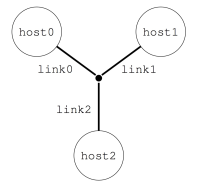

In [ ]:
%%writefile cluster1.xml

<?xml version='1.0'?>
<!DOCTYPE platform SYSTEM "https://simgrid.org/simgrid.dtd">
<platform version="4.1">
  <zone id="AS0" routing="Full">
    <host id="host0" speed="1Gf"/>
    <host id="host1" speed="2Gf"/>
    <host id="host2" speed="40Gf"/>
    <link id="link0" bandwidth="125MBps" latency="100us"/>
    <link id="link1" bandwidth="50MBps" latency="150us"/>
    <link id="link2" bandwidth="250MBps" latency="50us"/>
    <route src="host0" dst="host1"><link_ctn id="link0"/><link_ctn id="link1"/></route>
    <route src="host1" dst="host2"><link_ctn id="link1"/><link_ctn id="link2"/></route>
    <route src="host0" dst="host2"><link_ctn id="link0"/><link_ctn id="link2"/></route>
  </zone>
</platform>

Overwriting cluster1.xml


Os elementos básicos (com \<host> e \<link>) são descritos primeiro e, em seguida, as rotas entre qualquer par de hosts são fornecidas explicitamente com \<route>. Qualquer host deve receber uma velocidade computacional em flops, enquanto os links devem receber uma latência e uma largura de banda. Você pode escrever 1Gf para 1.000.000.000 flops.

As rotas definidas com <route> são simétricas por padrão, o que significa que a lista de links percorridos de A a B é a mesma de B a A. Defina explicitamente rotas não simétricas, se preferir.

- Full - duṕlex
- velocidade de cada host: 40 giga flops (quantidade de operações flutuantes que faço por seguhndo)
- Largura de bandas - latência (tempo que o pacote gasta de chegar em outro)
- Definição de todas e seus links.

**EXERCÍCIO 1**

Especificar, através de um arquivo XML (cluster2.xml), um cluster contendo um nodo-mestre e oito nodos-escravos. As especificações dos links fica a seu critério.

In [ ]:
#COM VÁRIOS LINKS

%%writefile cluster2.xml

<?xml version='1.0'?>
<!DOCTYPE platform SYSTEM "https://simgrid.org/simgrid.dtd">
<platform version="4.1">
  <zone id="AS0" routing="Full">
    <host id="master" speed="2Gf" />
    <host id="slave1" speed="1Gf"/>
    <host id="slave2" speed="1Gf"/>
    <host id="slave3" speed="1Gf"/>
    <host id="slave4" speed="1Gf"/>
    <host id="slave5" speed="1Gf"/>
    <host id="slave6" speed="1Gf"/>
    <host id="slave7" speed="1Gf"/>
    <host id="slave8" speed="1Gf"/>

    <link id="link1" bandwidth="125MBps" latency="100us"/>
    <link id="link2" bandwidth="50MBps" latency="150us"/>
    <link id="link3" bandwidth="250MBps" latency="50us"/>
    <link id="link4" bandwidth="125MBps" latency="100us"/>
    <link id="link5" bandwidth="50MBps" latency="150us"/>
    <link id="link6" bandwidth="250MBps" latency="50us"/>
    <link id="link7" bandwidth="125MBps" latency="100us"/>
    <link id="link8" bandwidth="50MBps" latency="150us"/>
    <link id="link9" bandwidth="125MBps" latency="100us"/>

    <route src="master" dst="slave1"><link_ctn id="link1"/></route>
    <route src="slave1" dst="slave2"><link_ctn id="link2"/></route>
    <route src="slave2" dst="slave3"><link_ctn id="link3"/></route>
    <route src="slave3" dst="slave4"><link_ctn id="link4"/></route>
    <route src="slave4" dst="slave5"><link_ctn id="link5"/></route>
    <route src="slave5" dst="slave6"><link_ctn id="link6"/></route>
    <route src="slave6" dst="slave7"><link_ctn id="link7"/></route>
    <route src="slave7" dst="slave8"><link_ctn id="link8"/></route>
    <route src="slave8" dst="master"><link_ctn id="link9"/></route>

  </zone>
</platform>

Overwriting cluster2.xml


In [ ]:
%%writefile cluster2.xml

<?xml version='1.0'?>
<!DOCTYPE platform SYSTEM "https://simgrid.org/simgrid.dtd">
<platform version="4.1">
  <zone id="AS0" routing="Full">
    <host id="host0" speed="40Gf"/>
    <host id="host1" speed="20Gf"/>
    <host id="host2" speed="20Gf"/>
    <host id="host3" speed="20Gf"/>
    <host id="host4" speed="20Gf"/>
    <host id="host5" speed="20Gf"/>
    <host id="host6" speed="20Gf"/>
    <host id="host7" speed="20Gf"/>
    <host id="host8" speed="20Gf"/>
    <link id="link0" bandwidth="250MBps" latency="50us"/>
    <route src="host0" dst="host1"><link_ctn id="link0"/></route>
    <route src="host1" dst="host2"><link_ctn id="link0"/></route>
    <route src="host2" dst="host3"><link_ctn id="link0"/></route>
    <route src="host3" dst="host4"><link_ctn id="link0"/></route>
    <route src="host4" dst="host5"><link_ctn id="link0"/></route>
    <route src="host5" dst="host6"><link_ctn id="link0"/></route>
    <route src="host7" dst="host8"><link_ctn id="link0"/></route>
    <route src="host8" dst="host0"><link_ctn id="link0"/></route>
  </zone>
</platform>

Overwriting cluster2.xml


Existem diversos modelos de clusters pre-definidos em SIMGRID. Para instalá-los no nosso ambiente, vamos executar os seguintes comandos


In [ ]:
!apt install simgrid

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libsimgrid-dev' instead of 'simgrid'
The following additional packages will be installed:
  libsimgrid3.24 lua5.1 simgrid-java
Suggested packages:
  java-virtual-machine
The following NEW packages will be installed:
  libsimgrid-dev libsimgrid3.24 lua5.1 simgrid-java
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,644 kB of archives.
After this operation, 5,797 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libsimgrid3.24 amd64 3.24+dfsg-3 [1,328 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 lua5.1 amd64 5.1.5-8.1build4 [94.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 simgrid-java amd64 3.24+dfsg-3 [76.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libsimgrid-dev amd64 3.24+dfsg-3 [145 kB]
Fetched 1,644 kB in 2s (681 kB/s)
Selecting p

In [ ]:
!git clone https://framagit.org/simgrid/simgrid-template-smpi.git

Cloning into 'simgrid-template-smpi'...
remote: Enumerating objects: 482, done.
remote: Counting objects: 100% (482/482), done.
remote: Compressing objects: 100% (338/338), done.
remote: Total 482 (delta 181), reused 434 (delta 139), pack-reused 0
Receiving objects: 100% (482/482), 967.28 KiB | 1.84 MiB/s, done.
Resolving deltas: 100% (181/181), done.


IMPORTANTE:

Os modelos de clusters estarão instalados no diretório simgrid-template-smpi. SEMPRE QUE FOR USÁ-LOS COPIAR os modelos cluster1.xml e cluster2.xml para este diretório.

**APLICAÇÕES MPI**

Aplicações MPI fazem uso do header mpi.h, que disponibiliza uma série de funções para estrutura o ambiente de comunicação sob o cluster e realizar as comunicações entre os processos executando nos nodos.

Vamos considerar este primeiro exemplo, que faz uma comunicação em anel sob um cluster:

In [ ]:
%%writefile round.c

#include <mpi.h>
#include <stdio.h>
#include <stdlib.h>

#define N (1024 * 1024 * 1)

int main(int argc, char* argv[])
{
  int size, rank;
  struct timeval start, end;
  char hostname[256];
  int hostname_len;

  MPI_Init(&argc, &argv);

  MPI_Comm_rank(MPI_COMM_WORLD, &rank);  
  MPI_Comm_size(MPI_COMM_WORLD, &size);
  MPI_Get_processor_name(hostname, &hostname_len); // aqui pegamos o nome da máquina
  printf("%s", hostname);

  // Allocate a 1 MiB buffer
  char* buffer = malloc(sizeof(char) * N);

  // Communicate along the ring
  if (rank == 0) { // sou o nó 0, o master?
    gettimeofday(&start, NULL); // medindo o tempo de execução
    printf("Rank %d (running on '%s'): sending the message rank %d\n", rank, hostname, 1);
    MPI_Send(buffer, N, MPI_BYTE, 1, 1, MPI_COMM_WORLD);
    MPI_Recv(buffer, N, MPI_BYTE, size - 1, 1, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
    printf("Rank %d (running on '%s'): received the message from rank %d\n", rank, hostname, size - 1);
    gettimeofday(&end, NULL);
    printf("%f\n", (end.tv_sec * 1000000.0 + end.tv_usec - start.tv_sec * 1000000.0 - start.tv_usec) / 1000000.0);

  } else {
    MPI_Recv(buffer, N, MPI_BYTE, rank - 1, 1, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
    printf("Rank %d (running on '%s'): receive the message and sending it to rank %d\n", rank, hostname,
           (rank + 1) % size);
    MPI_Send(buffer, N, MPI_BYTE, (rank + 1) % size, 1, MPI_COMM_WORLD);
  }

  MPI_Finalize();
  return 0;
}

Overwriting round.c


In [ ]:
!smpicc round.c -o round

In [ ]:
!smpirun -np 16 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./round

[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
node-0.simgrid.orgnode-1.simgrid.orgnode-2.simgrid.orgnode-3.simgrid.orgnode-4.simgrid.orgnode-5.simgrid.orgnode-6.simgrid.orgnode-7.simgrid.orgnode-8.simgrid.orgnode-9.simgrid.orgnode-10.simgrid.orgnode-11.simgrid.orgnode-12.simgrid.orgnode-13.simgrid.orgnode-14.simgrid.orgnode-15.simgrid.orgRank 0 (running on 'node-0.simgrid.org'): sending the message rank 1
Rank 1 (running on 'node-1.simgrid.org'): receive the message and sending it

**EXERCÍCIO 3** 

Execute o código anterior nas arquiteturas cluster1.xml e cluster2.xml. Há alguma diferença no tempo de execução em função da arquitetura ?

In [ ]:
!smpirun -np 3 -platform simgrid-template-smpi/cluster1.xml -hostfile simgrid-template-smpi/cluster_hostfile ./round

[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
[0.000000] ../src/surf/sg_platf.cpp:447: [xbt/CRITICAL] Cannot create actor '0': host 'node-0.simgrid.org' does not exist
Existing hosts: 'host0', 'host1', 'host2', '
./round --cfg=smpi/privatization:1 --cfg=surf/precision:1e-9 --cfg=network/model:SMPI simgrid-template-smpi/cluster1.xml smpitmp-appH7azB1
Execution failed with code 134.


In [ ]:
!smpirun -np 9 -platform simgrid-template-smpi/cluster2.xml -hostfile simgrid-template-smpi/cluster_hostfile ./round

[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
[0.000000] ../src/surf/sg_platf.cpp:447: [xbt/CRITICAL] Cannot create actor '0': host 'node-0.simgrid.org' does not exist
Existing hosts: 'host0', 'host1', 'host2', 'host3', 'host4', 'host5', 'host6', 'host7', 'host8', '
./round --cfg=smpi/privatization:1 --cfg=surf/precision:1e-9 --cfg=network/model:SMPI simgrid-template-smpi/cluster2.xml smpitmp-appEMrDj8
Execution failed with code 134.


#**AULA 17 - OPERAÇÕES DE REDUÇÃO EM MPI**

Na aula passada, implementamos um código para aproximação de PI usando MPI com 8 e 16 nodos de um cluster, utilizando as primitivas de comunicação MPI_Send e MPI_Recv.

rand de 2 a 3:

```cpp

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int main() {
    int min = 2;
    int max = 3;

    srand(time(NULL));  // Inicializar a semente da função rand com base no tempo atual

    // Gerar um número pseudoaleatório no intervalo de 0 a RAND_MAX
    int random_num = rand();

    // Ajustar o número gerado para o intervalo de min a max
    double adjusted_num = (double)random_num / RAND_MAX * (max - min) + min;

    printf("Número aleatório no intervalo de %d a %d: %.2f\n", min, max, adjusted_num);

    return 0;
}

```

In [ ]:
%%writefile exemplo.c

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
# include <time.h>
int main() {
    // Gerar um número pseudoaleatório no intervalo de 0 a RAND_MAX
    srand(time(NULL));  // Inicializar a semente da função rand com base no tempo atual
    double random_num = (((double)(rand()%2))) + 2;

    printf("Número aleatório  %.2f \n", random_num);

}


Overwriting exemplo.c


In [ ]:
!gcc -Wall -O3 exemplo.c -o exemplo

In [ ]:
!./exemplo

Número aleatório  3.00 


In [ ]:
%%writefile pi_send_receive.c

#include <mpi.h>
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#define SEED_MPI 35791246

int main(int argc, char* argv[])
{
  long niter = 10000000; // número de iterações para fazer o calculo do pi
  int myid; // o id do processo
  int nodenum; // o número do node
  double x,y;  //x,y valor da coordenada aleatória para sortear e ver se está no círculo 
  double z;    //usado para checar se x^2+y^2<=1
  double pi;    //guarda o valor do pi calculado
  int count = 0;

  MPI_Init(&argc, &argv);                 //Start MPI
  MPI_Comm_rank(MPI_COMM_WORLD, &myid);           //get rank of node's process
  MPI_Comm_size(MPI_COMM_WORLD, &nodenum);

  int recieved[nodenum];  // declarando um array para receber os counts
  long recvniter[nodenum];  // declarando um array para receber o numero de iterações 
  srand(SEED_MPI+myid);                       //Give rand() a seed value. Needs to be different on each node
  
  if(myid != 0)
    {
      for (int i = 0; i < niter; i++){
          x= ((double)rand())/RAND_MAX;           //gets a random x coordinate
          y =((double)rand())/RAND_MAX;           //gets a random y coordinate
          z = sqrt(x*x+y*y);                  //Checks to see if number in inside unit circle
          if (z<=1)
          {
              count++;                //if it is, consider it a valid random point
          }
      }
      for(int i=0; i<nodenum; ++i)
      {
           MPI_Send(&count,1,MPI_INT,0,1,MPI_COMM_WORLD);  // tamanho do que tá mandando para o master, tipo, master, o numero da mensagem e para o mundo
           MPI_Send(&niter,1,MPI_LONG,0,2,MPI_COMM_WORLD);
      }
    }
  else if (myid == 0) // se a rede cair pode devolver -1, então é bom especificar para quando é 0
  {
        
      for(int i=0; i<nodenum; ++i)
      {
          MPI_Recv(&recieved[i],nodenum,MPI_INT,MPI_ANY_SOURCE,1,MPI_COMM_WORLD,MPI_STATUS_IGNORE); // não importa de quem vou receber - MPI_ANY_SOURCE
          MPI_Recv(&recvniter[i],nodenum,MPI_LONG,MPI_ANY_SOURCE,2,MPI_COMM_WORLD,MPI_STATUS_IGNORE);
      }
  }
 
   if (myid == 0)                      //if root process
    {
        int finalcount = 0;
        long finalniter = 0;
        for(int i = 0; i<nodenum; ++i)
        {
            finalcount += recieved[i];
            finalniter += recvniter[i];
        }
 
        pi = ((double)finalcount/(double)finalniter)*4.0;               //p = 4(m/n)
        printf("Pi: %f\n", pi);             //Print the calculated value of pi
 
    }

  MPI_Finalize();
  return 0;
}

Overwriting pi_send_receive.c


In [ ]:
!smpicc pi_send_receive.c -o pi_send_receive -lm

In [ ]:
!smpirun -np 16 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./pi_send_receive

[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Pi: 3.141914


Nesse trecho de código, duas chamadas à função `MPI_Send()` são feitas para enviar dados de um processo MPI para o processo mestre (rank 0) usando a comunicação ponto a ponto.

A função `MPI_Send()` é usada para enviar uma mensagem a partir de um processo específico para um destino específico. Ela possui a seguinte assinatura:

```c
int MPI_Send(const void* buf, int count, MPI_Datatype datatype, int dest, int tag, MPI_Comm comm)
```

- `buf`: O endereço do buffer que contém os dados a serem enviados.
- `count`: O número de elementos no buffer a serem enviados.
- `datatype`: O tipo de dado que está sendo enviado. Nesse caso, é utilizado `MPI_INT` para enviar um inteiro e `MPI_LONG` para enviar um longo.
- `dest`: O rank do processo de destino.
- `tag`: Uma tag que identifica a mensagem. É um valor inteiro usado para diferenciar diferentes tipos de mensagens entre os processos.
- `comm`: O comunicador MPI que define o grupo de processos envolvidos na comunicação. Nesse caso, é usado `MPI_COMM_WORLD`, que representa todos os processos do comunicador padrão do MPI.

No primeiro `MPI_Send()`, o valor da variável `count` (que provavelmente é um inteiro) é enviado para o processo mestre (rank 0) com a tag 1. Essa mensagem pode ser interpretada como o número da mensagem.

No segundo `MPI_Send()`, o valor da variável `niter` (que provavelmente é um longo) é enviado para o processo mestre (rank 0) com a tag 2. Essa mensagem pode ser interpretada como o número de iterações.

Essas chamadas `MPI_Send()` enviam os dados para o processo mestre, permitindo que ele receba e processe as informações enviadas pelos outros processos. O processo mestre pode usar a função `MPI_Recv()` para receber essas mensagens e extrair os dados enviados pelos outros processos.

Nesse trecho de código, existem chamadas `MPI_Send()` e `MPI_Recv()` sendo usadas para enviar e receber mensagens entre os processos MPI.

1. No trecho `if(myid != 0)`, os processos com `myid` diferente de 0 executam um loop onde geram pontos aleatórios e contam quantos desses pontos estão dentro de um círculo unitário. A contagem é armazenada na variável `count`.

2. Em seguida, os processos enviam o valor de `count` para o processo mestre (com `myid` igual a 0) usando `MPI_Send()`. Eles também enviam o valor de `niter` (provavelmente o número de iterações) para o processo mestre.

   ```c
   MPI_Send(&count, 1, MPI_INT, 0, 1, MPI_COMM_WORLD);
   MPI_Send(&niter, 1, MPI_LONG, 0, 2, MPI_COMM_WORLD);
   ```

   Essas chamadas enviam os valores de `count` e `niter` para o processo mestre com as tags 1 e 2, respectivamente.

3. No trecho `else if (myid == 0)`, o processo mestre (com `myid` igual a 0) recebe as mensagens dos outros processos usando `MPI_Recv()`. Ele recebe os valores de `count` e `niter` de cada processo e armazena-os nos arrays `recieved` e `recvniter`.

   ```c
   MPI_Recv(&recieved[i], nodenum, MPI_INT, MPI_ANY_SOURCE, 1, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
   MPI_Recv(&recvniter[i], nodenum, MPI_LONG, MPI_ANY_SOURCE, 2, MPI_COMM_WORLD, MPI_STATUS_IGNORE);
   ```

   A chamada `MPI_Recv()` recebe mensagens de qualquer origem (`MPI_ANY_SOURCE`) com as tags 1 e 2. Os valores recebidos são armazenados nos arrays `recieved` e `recvniter`, respectivamente.

4. A declaração `int recieved[nodenum];` declara um array de inteiros chamado `recieved` com tamanho `nodenum`. Essa declaração reserva espaço para armazenar os valores recebidos de `count` de cada processo.

5. Da mesma forma, a declaração `long recvniter[nodenum];` declara um array de longos chamado `recvniter` com tamanho `nodenum`. Essa declaração reserva espaço para armazenar os valores recebidos de `niter` de cada processo.

Essas operações de envio e recebimento (`MPI_Send()` e `MPI_Recv()`) permitem a troca de mensagens entre os processos MPI, permitindo a comunicação e sincronização entre eles. Nesse caso específico, os processos enviam seus resultados de contagem de pontos para o processo mestre, que os recebe e armazena para posterior processamento.

### **MPI_REDUCE e MPI_ALLREDUCE**

**MPI_Reduce** é uma primitiva de comunicação MPI que coleta valores calculados por cada processo-escravo e os repassa para o processo-mestre para que possam ser reduzidos. A sintaxe de MPI_Reduce é mostrada abaixo:

**MPI_Reduce(
    void* send_data,
    void* recv_data,
    int count,
    MPI_Datatype datatype,
    MPI_Op op,
    int root,
    MPI_Comm communicator)**


O parâmetro send_data é um array de elementos do tipo datatype que cada processo deseja reduzir. O recv_data só é relevante no processo com rank root. A matriz recv_data contém o resultado reduzido e tem um tamanho de sizeof(datatype) * count. O parâmetro op é a operação que você deseja aplicar aos seus dados. O MPI contém um conjunto de operações de redução comuns que podem ser usadas. Embora as operações de redução personalizadas possam ser definidas, isso está além do escopo desta aula. As operações de redução definidas pela MPI incluem:

* **MPI_MAX** - Retorna o elemento máximo.
* **MPI_MIN** - Retorna o elemento mínimo.
* **MPI_SUM** - Soma os elementos.
* **MPI_PROD** - Multiplica todos os elementos.
* **MPI_LAND** - AND lógico entre os elementos.
* **MPI_LOR** - OR lógico entre os elementos.
* **MPI_BAND** - AND bit-a-bit dos elementos.
* **MPI_BOR** - OR bit-a-bit dos elementos.
* **MPI_MAXLOC** - Retorna o valor máximo e o rank do processo que o possui.
* **MPI_MINLOC** - Retorna o valor mínimo e o rank do processo que o possui.

Abaixo está uma ilustração do padrão de comunicação do MPI_Reduce para o operador de soma:

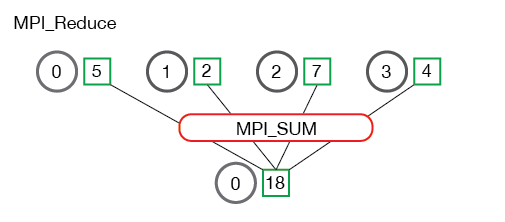

Também é útil ver o que acontece quando os processos contêm vários elementos. A ilustração abaixo mostra a redução de vários números por processo:

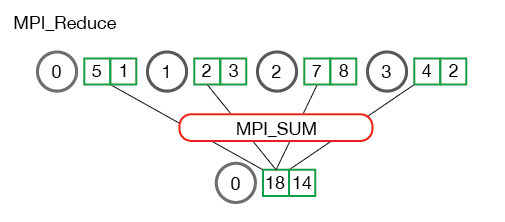

Cada um dos processos da ilustração acima tem dois elementos. A soma resultante ocorre por elemento. Em outras palavras, em vez de somar todos os elementos de todas as matrizes em um único elemento, o i-ésimo elemento de cada matriz é somado ao i-ésimo elemento na matriz de resultados do processo 0.

Muitos aplicativos paralelos exigirão o acesso aos resultados reduzidos em todos os processos, em vez do processo-mestre. **MPI_Allreduce** é uma primitiva de comunicação MPI que reduzirá os valores e distribuirá os resultados para todos os processos. O protótipo da função é o seguinte:

**MPI_Allreduce(
    void* send_data,
    void* recv_data,
    int count,
    MPI_Datatype datatype,
    MPI_Op op,
    MPI_Comm communicator)**

Como você deve ter notado, MPI_Allreduce é idêntico a MPI_Reduce com a exceção de que não precisa de um ID de processo raiz (já que os resultados são distribuídos para todos os processos). A próxima imagem ilustra o padrão de comunicação de MPI_Allreduce:

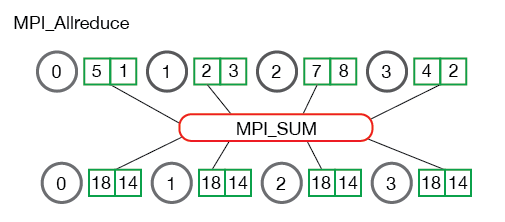

Claro! Vou dar um exemplo para ilustrar a diferença entre MPI_Reduce e MPI_Allreduce.

Considere que temos 4 processos MPI (0, 1, 2, 3) e queremos calcular a soma de um conjunto de valores em todos os processos.

Com MPI_Reduce:
```c
int my_value = 5;  // Valor local em cada processo
int sum = 0;      // Variável para armazenar o resultado final

MPI_Reduce(&my_value, &sum, 1, MPI_INT, MPI_SUM, 0, MPI_COMM_WORLD);

if (my_rank == 0) {
    // Aqui, apenas o processo de rank 0 possui o resultado final
    printf("Resultado final da soma: %d\n", sum);
}
```

Neste caso, apenas o processo com rank 0 terá acesso ao resultado final da soma. Os demais processos não terão acesso direto ao valor calculado.

Com MPI_Allreduce:
```c
int my_value = 5;  // Valor local em cada processo
int sum = 0;      // Variável para armazenar o resultado final

MPI_Allreduce(&my_value, &sum, 1, MPI_INT, MPI_SUM, MPI_COMM_WORLD);

// Todos os processos têm acesso ao resultado final
printf("Resultado final da soma: %d\n", sum);
```

Aqui, todos os processos têm acesso ao resultado final da soma diretamente, sem a necessidade de comunicações adicionais. O valor da soma é retornado em `sum` para todos os processos.

Em resumo, com MPI_Reduce, o resultado final da operação de redução é armazenado apenas no processo mestre (definido pelo parâmetro `root`). Já com MPI_Allreduce, o resultado final é retornado em todos os processos participantes da comunicação, permitindo que todos tenham acesso ao valor final sem a necessidade de comunicações extras.

O trecho de código abaixo mostra como aplicar MPI_REDUCE para calcular uma média de valores produzidos por processos-escravos:

######**AQUI USAMOS O REDUCE PORQUE APENAS O NÓ MESTRE (ID == 0) VAI TER ACESSO AO VALOR DA SOMA**

In [ ]:
%%writefile reduce.c

#include <stdio.h>
#include <stdlib.h>
#include <mpi.h>
#include <assert.h>
#include <time.h>
#define SEED_MPI 35791246

int main(int argc, char* argv[]){
  int n = atoi(argv[1]);
  int nodenum;
  int myid;      

  MPI_Init(&argc, &argv);                 //Start MPI
  MPI_Comm_rank(MPI_COMM_WORLD, &myid);           //get rank of node's process
  MPI_Comm_size(MPI_COMM_WORLD, &nodenum);
  srand(SEED_MPI+myid);  

  float *rand_nums = (float*)malloc(sizeof(float) * n);
  assert(rand_nums != NULL);
  
  for (int i = 0; i < n; i++){
    double elemento = ((double)rand())/RAND_MAX;
    rand_nums[i] = elemento;
  }

  float local_sum = 0;
  for (int j = 0; j < n; j++){
    local_sum+= rand_nums[j];
  }

    // Print the random numbers on each process
  printf("Local sum for process %d - %f, avg = %f\n", myid, local_sum, local_sum / n);

  float global_sum;
  MPI_Reduce(&local_sum, &global_sum, 1, MPI_FLOAT, MPI_SUM, 0, MPI_COMM_WORLD);
  // MPI_Reduce( void* send_data, void* recv_data, int count, MPI_Datatype datatype, MPI_Op op, int root, MPI_Comm communicator)

    // Print the result
  if (myid == 0) {
    printf("Total sum = %f, avg = %f\n", global_sum, global_sum / (nodenum * n));
  }

  // Clean up
  free(rand_nums);

  MPI_Barrier(MPI_COMM_WORLD);
  MPI_Finalize();
}


Writing reduce.c


In [ ]:
!smpicc reduce.c -o reduce -lm

In [ ]:
!smpirun -np 16 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./reduce 5


[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Local sum for process 0 - 3.402148, avg = 0.680430
Local sum for process 1 - 2.722395, avg = 0.544479
Local sum for process 2 - 1.557424, avg = 0.311485
Local sum for process 3 - 2.890257, avg = 0.578051
Local sum for process 4 - 2.195877, avg = 0.439175
Local sum for process 5 - 2.030373, avg = 0.406075
Local sum for process 6 - 1.876693, avg = 0.375339
Local sum for process 7 - 2.168331, avg = 0.433666
Local sum for process 8 - 1.521

In [ ]:
%%writefile reduce.c

#include <stdio.h>
#include <stdlib.h>
#include <mpi.h>
#include <assert.h>
#include <time.h>

// Creates an array of random numbers. Each number has a value from 0 - 1
float *create_rand_nums(int num_elements) {
  float *rand_nums = (float *)malloc(sizeof(float) * num_elements);
  assert(rand_nums != NULL);
  int i;
  for (i = 0; i < num_elements; i++) {
    rand_nums[i] = (rand() / (float)RAND_MAX);
  }
  return rand_nums;
}

int main(int argc, char** argv) {
  if (argc != 2) {
    fprintf(stderr, "Usage: avg num_elements_per_proc\n");
    exit(1);
  }

  int num_elements_per_proc = atoi(argv[1]);

  MPI_Init(NULL, NULL);

  int world_rank;
  MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);
  int world_size;
  MPI_Comm_size(MPI_COMM_WORLD, &world_size);

  // Create a random array of elements on all processes.
  srand(time(NULL)*world_rank);   // Seed the random number generator to get different results each time for each processor
  float *rand_nums = NULL;
  rand_nums = create_rand_nums(num_elements_per_proc);

  // Sum the numbers locally
  float local_sum = 0;
  int i;
  for (i = 0; i < num_elements_per_proc; i++) {
    local_sum += rand_nums[i];
  }

  // Print the random numbers on each process
  printf("Local sum for process %d - %f, avg = %f\n",
         world_rank, local_sum, local_sum / num_elements_per_proc);

  // Reduce all of the local sums into the global sum
  float global_sum;
  MPI_Reduce(&local_sum, &global_sum, 1, MPI_FLOAT, MPI_SUM, 0,
             MPI_COMM_WORLD);  // sempre cliente mandando para o servidor

  // Print the result
  if (world_rank == 0) {
    printf("Total sum = %f, avg = %f\n", global_sum,
           global_sum / (world_size * num_elements_per_proc));
  }

  // Clean up
  free(rand_nums);

  MPI_Barrier(MPI_COMM_WORLD);
  MPI_Finalize();
}

Writing reduce.c


In [ ]:
!smpicc reduce.c -o reduce -lm #para incluir uma nova biblioteca. Quando for gerar o código ligue o código a libm.so. Lá no /usr/lib

In [ ]:
!smpirun -np 16 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./reduce 1000000


[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Local sum for process 0 - 500003.750000, avg = 0.500004
Local sum for process 1 - 499448.750000, avg = 0.499449
Local sum for process 2 - 499727.656250, avg = 0.499728
Local sum for process 3 - 500087.812500, avg = 0.500088
Local sum for process 4 - 500329.500000, avg = 0.500329
Local sum for process 5 - 500265.656250, avg = 0.500266
Local sum for process 6 - 500040.125000, avg = 0.500040
Local sum for process 7 - 500141.125000, avg = 

###### **AQUI USAMOS O ALL_REDUCE PARA QUE TODOS OS NÓS TENHAM ACESSO AO VALOR DA SOMA.**

PARA CALCULAR A VARIÂNCIA PRECISA SER ASSIM NÉ,PORQUE TODOS PRECISAM DO VALOR DA MÉDIA PARA CONSEGUIR COMPUTAR A (XI - MU)^2

No código abaixo:

O world_size representa o número total de processos que estão executando o programa MPI. Cada processo é atribuído um identificador exclusivo chamado rank que varia de 0 a world_size - 1. O rank é usado para identificar um processo específico em uma comunicação coletiva ou ponto a ponto.

In [ ]:
%%writefile all_reduce.c
#include <stdio.h>
#include <stdlib.h>
#include <mpi.h>
#include <math.h>
#include <assert.h>

// Creates an array of random numbers. Each number has a value from 0 - 1

float *create_rand_nums(int num_elements) {
  float *rand_nums = (float *)malloc(sizeof(float) * num_elements);
  assert(rand_nums != NULL);
  int i;
  for (i = 0; i < num_elements; i++) {
    rand_nums[i] = (rand() / (float)RAND_MAX);
  }
  return rand_nums;
}

int main(int argc, char** argv) {
  if (argc != 2) {
    fprintf(stderr, "Usage: avg num_elements_per_proc\n");
    exit(1);
  }

  int num_elements_per_proc = atoi(argv[1]);

  MPI_Init(NULL, NULL);

  int world_rank;
  MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);
  int world_size;
  MPI_Comm_size(MPI_COMM_WORLD, &world_size);

  // Create a random array of elements on all processes.
  srand(time(NULL)*world_rank); // Seed the random number generator of processes uniquely
  float *rand_nums = NULL;
  rand_nums = create_rand_nums(num_elements_per_proc);

  // Sum the numbers locally
  float local_sum = 0;
  int i;
  for (i = 0; i < num_elements_per_proc; i++) {
    local_sum += rand_nums[i];
  }

  // Reduce all of the local sums into the global sum in order to
  // calculate the mean
  float global_sum;
  MPI_Allreduce(&local_sum, &global_sum, 1, MPI_FLOAT, MPI_SUM,
                MPI_COMM_WORLD);
  float mean = global_sum / (num_elements_per_proc * world_size);

  // Compute the local sum of the squared differences from the mean
  float local_sq_diff = 0;
  for (i = 0; i < num_elements_per_proc; i++) {
    local_sq_diff += (rand_nums[i] - mean) * (rand_nums[i] - mean);
  }

  // Reduce the global sum of the squared differences to the root process
  // and print off the answer
  float global_sq_diff;
  MPI_Reduce(&local_sq_diff, &global_sq_diff, 1, MPI_FLOAT, MPI_SUM, 0,
             MPI_COMM_WORLD);

  // The standard deviation is the square root of the mean of the squared
  // differences.
  if (world_rank == 0) {
    float stddev = sqrt(global_sq_diff /
                        (num_elements_per_proc * world_size));
    printf("Mean - %f, Standard deviation = %f\n", mean, stddev);
  }

  // Clean up
  free(rand_nums);

  MPI_Barrier(MPI_COMM_WORLD);
  MPI_Finalize();
}

Writing all_reduce.c


In [ ]:
!smpicc all_reduce.c -o all_reduce -lm #para incluir uma nova biblioteca. Quando for gerar o código ligue o código a libm.so. Lá no /usr/lib

In [ ]:
!smpirun -np 16 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./all_reduce 1000000


[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Mean - 0.500123, Standard deviation = 0.288558


**EXERCÍCIO 3**

Refatore o código pi_send_receive.c para utilizar a primitiva MPI_Reduce ao invés de MPI_Send e MPI_Recv.

In [ ]:
%%writefile pi_send_receive_allreduce.c

#include <mpi.h>
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#define SEED_MPI 35791246

int main(int argc, char* argv[])
{
  long niter = 10000000; // número de iterações para fazer o calculo do pi
  int myid; // o id do processo
  int nodenum; // o número do node
  double x,y;  //x,y valor da coordenada aleatória para sortear e ver se está no círculo 
  double z;    //usado para checar se x^2+y^2<=1
  double pi;    //guarda o valor do pi calculado
  int count = 0;

  MPI_Init(&argc, &argv);                 //Start MPI
  MPI_Comm_rank(MPI_COMM_WORLD, &myid);           //get rank of node's process
  MPI_Comm_size(MPI_COMM_WORLD, &nodenum);

  int global_count;  // declarando um array para receber os counts
  srand(SEED_MPI+myid);                       //Give rand() a seed value. Needs to be different on each node
  
  //if(myid != 0)
  {
    for (int i = 0; i < niter; i++){
        x= ((double)rand())/RAND_MAX;           //gets a random x coordinate
        y =((double)rand())/RAND_MAX;           //gets a random y coordinate
        z = sqrt(x*x+y*y);                  //Checks to see if number in inside unit circle
        if (z<=1)
        {
            count++;                //if it is, consider it a valid random point
        }
    }
  }

  MPI_Allreduce(&count, &global_count, 1, MPI_INT, MPI_SUM, MPI_COMM_WORLD);  // Perform reduction on count

  pi = ((double)global_count/(double)(niter*nodenum))*4.0;               //p = 4(m/n)
  printf("Pi: %f\n", pi);             //Print the calculated value of pi


  MPI_Finalize();
  return 0;
}

Writing pi_send_receive_allreduce.c


In [ ]:
!smpicc pi_send_receive_allreduce.c -o pi_send_receive_allreduce -lm

In [ ]:
!smpirun -np 20 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./pi_send_receive_allreduce 


[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592
Pi: 3.141592


In [ ]:
#OUTRO JEITO


%%writefile pi_send_receive_reduce.c

#include <stdio.h>
#include <stdlib.h>
#include "mpi.h"
#include <math.h>
#define SEED_MPI 35791246
 
int main(int argc, char* argv[])
{
    long niter = 10000000;
    int myid;                       //holds process's rank id
    double x,y;                     //x,y value for the random coordinate
    int i, count=0;                 //Count holds all the number of how many good coordinates
    int global_sum_count;
    int global_sum_niter;
    double z;                       //Used to check if x^2+y^2<=1
    double pi;                      //holds approx value of pi
    int reducedcount;
    int reducedniter;
    int nodenum;
 
    MPI_Init(&argc, &argv);                 //Start MPI
    MPI_Comm_rank(MPI_COMM_WORLD, &myid);           //get rank of node's process
    MPI_Comm_size(MPI_COMM_WORLD, &nodenum);
    srand(SEED_MPI+myid);                       //Give rand() a seed value. Needs to be different on each node
 

    
    for (i=0; i<niter; ++i)                  //main loop
    {
        x= ((double)rand())/RAND_MAX;           //gets a random x coordinate
        y =((double)rand())/RAND_MAX;           //gets a random y coordinate
        z = sqrt(x*x+y*y);                  //Checks to see if number in inside unit circle
        if (z<=1)
        {
            count++;                //if it is, consider it a valid random point
        }
    }

    MPI_Reduce(&count, &reducedcount, 1, MPI_INT, MPI_SUM, 0, MPI_COMM_WORLD);  // Perform reduction on count
    MPI_Reduce(&niter, &reducedniter, 1, MPI_INT, MPI_SUM, 0, MPI_COMM_WORLD);

    if (myid == 0)                      //if root process
    {
        pi = ((double)reducedcount / (double)(reducedniter)) * 4.0;    //p = 4(m/n)
        printf("Pi: %f\n", pi);             //Print the calculated value of pi
    }
    
 
    MPI_Finalize();                     //Close the MPI instance
    return 0;
}

Overwriting pi_send_receive_reduce.c


In [ ]:
!smpicc pi_send_receive_reduce.c -o pi_send_receive_reduce -lm

In [ ]:
!smpirun -np 16 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./pi_send_receive_reduce 


[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Pi: 3.141626


**EXERCÍCIO 4**

Refatore o código anterior produzindo um código paralelo híbrido:

*   O nodo-mestre calculará o números de pontos via OpenMP com 16 threads
*   Os resultados dos nodos-escravos serão coletados via MPI_Reduce e reduzidos no nodo-mestre.




In [ ]:
%%writefile pi_send_receive_hibrido.c

#include <stdio.h>
#include <stdlib.h>
#include "mpi.h"
#include <math.h>
#include <omp.h>
#define SEED_MPI 35791246
 
int main(int argc, char* argv[])
{
    long niter = 10000000;
    int myid;                       //holds process's rank id
    double x,y;                     //x,y value for the random coordinate
    int i, count=0;                 //Count holds all the number of how many good coordinates
    int global_sum_count;
    int global_sum_niter;
    double z;                       //Used to check if x^2+y^2<=1
    double pi;                      //holds approx value of pi
    int reducedcount;
    int reducedniter;
    int nodenum;
 
    MPI_Init(&argc, &argv);                 //Start MPI
    MPI_Comm_rank(MPI_COMM_WORLD, &myid);           //get rank of node's process
    MPI_Comm_size(MPI_COMM_WORLD, &nodenum);
    srand(SEED_MPI+myid);                       //Give rand() a seed value. Needs to be different on each node
 
    omp_set_num_threads(16);

    #pragma omp parallel for reduction(+ : count)   // ou faz assim
    //#pragma omp parallel for shared(count)   // ou faz isso
    for (i=0; i<niter; ++i)                  //main loop
    {
        x= ((double)rand())/RAND_MAX;           //gets a random x coordinate
        y =((double)rand())/RAND_MAX;           //gets a random y coordinate
        z = sqrt(x*x+y*y);                  //Checks to see if number in inside unit circle
        if (z<=1)
        //#pragma omp critical
        {
            count++;                //if it is, consider it a valid random point
        }
    }

    MPI_Reduce(&count, &reducedcount, 1, MPI_INT, MPI_SUM, 0, MPI_COMM_WORLD);  // Perform reduction on count
    MPI_Reduce(&niter, &reducedniter, 1, MPI_INT, MPI_SUM, 0, MPI_COMM_WORLD);

    if (myid == 0)                      //if root process
    {
        pi = ((double)reducedcount / (double)(reducedniter)) * 4.0;    //p = 4(m/n)
        printf("Pi: %f\n", pi);             //Print the calculated value of pi
    }
    
 
    MPI_Finalize();                     //Close the MPI instance
    return 0;
}

Overwriting pi_send_receive_hibrido.c


In [ ]:
!smpicc pi_send_receive_hibrido.c -fopenmp -o pi_send_receive_hibrido -lm

In [ ]:
!smpirun -np 16 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./pi_send_receive_hibrido 


[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Pi: 3.140361


# **AULA 18 - MPI BROADCASTING**

Uma das coisas a lembrar sobre a comunicação coletiva é que ela implica um ponto de sincronização entre os processos. Isso significa que todos os processos devem atingir um ponto em seu código antes que possam começar a executar novamente.

Antes de entrar em detalhes sobre as rotinas de comunicação coletiva, vamos examinar a sincronização com mais detalhes. Acontece que o MPI possui uma função especial dedicada à sincronização de processos:

**MPI_Barrier(MPI_Comm communicator)**

O nome da função é bastante descritivo - a função forma uma barreira e nenhum processo no comunicador pode ultrapassar a barreira até que todos chamem a função. Imagine que o eixo horizontal representa a execução do programa e os círculos representam diferentes processos:

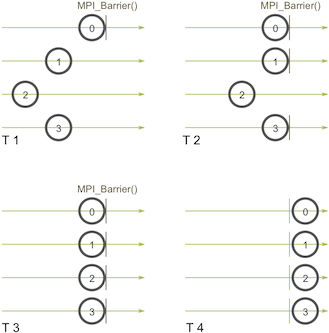

### **BROADCASTING (TRANSMISSÃO) EM MPI**

Uma transmissão é uma das técnicas padrão de comunicação coletiva. Durante uma transmissão, um processo envia os mesmos dados para todos os processos em um comunicador. Um dos principais usos da transmissão é enviar a entrada do usuário para um programa paralelo ou enviar parâmetros de configuração para todos os processos.

O padrão de comunicação de uma transmissão é da seguinte forma:

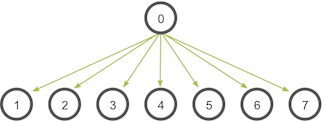

Neste exemplo, o processo zero é o processo-raiz e possui a cópia inicial dos dados. Todos os outros processos recebem a cópia dos dados.

Em MPI, a transmissão pode ser realizada usando MPI_Bcast. O protótipo da função é mostrado a seguir:

**MPI_Bcast(
    void* data,
    int count,
    MPI_Datatype datatype,
    int root,
    int tag,
    MPI_Comm communicator,
    status [opcional, pode ser: MPI_STATUS_IGNORE])**

Embora o processo raiz e os processos receptores executem tarefas diferentes, todos eles chamam a mesma função MPI_Bcast. Quando o processo raiz (no nosso exemplo era o processo zero) chamar MPI_Bcast, a variável de dados será enviada para todos os outros processos. Quando todos os processos receptores chamarem MPI_Bcast, a variável data será preenchida com os dados do processo raiz.

A transmissão pode ser implementada com as primitivas MPI_Send e MPI_Recv, conforme mostrado no programa abaixo:

In [ ]:
%%writefile mybcast.c

#include <stdio.h>
#include <stdlib.h>
#include <mpi.h>

void my_bcast(void* data, int count, MPI_Datatype datatype, int root, MPI_Comm communicator){
  int world_rank;
  MPI_Comm_rank(communicator, &world_rank); // inicializando as máquinas, todas tem o id em world_rank
  int world_size;
  MPI_Comm_size(communicator, &world_size); // aqui temos a quantidade de máquinas total

  if (world_rank == root){   // root normalmente é o processo 0
    // Se somos o processo root, mandamos os dados para todo mundo. 
    int i;
    for (i = 0; i < world_size; i++){
      if (i != world_rank){
        MPI_Send(data, count, datatype, i, 0, communicator); // evita que o processo raiz envie dados para si mesmo redundante e desnecessariamente.
      }
    }
  } else {
    // Se somos o processo que recebe, recebe então os dados do rooot
    MPI_Recv(data, count, datatype, root, 0, communicator, MPI_STATUS_IGNORE);
  }
}

int main(int argc, char** argv){
  MPI_Init(NULL, NULL);

  int world_rank;
  MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);

  int data;
  if (world_rank == 0){
    data = 100;
    printf("Process 0 broadcasting data %d\n", data);
    my_bcast(&data, 1, MPI_INT, 0, MPI_COMM_WORLD);
  } else {
    my_bcast(&data, 1, MPI_INT, 0, MPI_COMM_WORLD);
    printf("Process %d received data %d from root process\n", world_rank, data);
  }

  MPI_Finalize();
}

Overwriting mybcast.c


In [ ]:
!smpicc mybcast.c -o mybcast

In [ ]:
!smpirun -np 16 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./mybcast

[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Process 0 broadcasting data 100
Process 15 received data 100 from root process
Process 14 received data 100 from root process
Process 13 received data 100 from root process
Process 12 received data 100 from root process
Process 11 received data 100 from root process
Process 10 received data 100 from root process
Process 9 received data 100 from root process
Process 8 received data 100 from root process
Process 7 received data 100 from 

A função anterior é realmente muito ineficiente! Imagine que cada processo tenha apenas um link de rede de entrada/saída. Nossa função é usar apenas um link de rede do processo zero para enviar todos os dados. Uma implementação mais inteligente é um algoritmo de comunicação baseado em árvore que pode usar mais links de rede disponíveis de uma só vez.

O processo zero começa com os dados e os envia para o processo um. Semelhante ao nosso exemplo anterior, o processo zero também envia os dados para o processo dois no segundo estágio. A diferença com este exemplo é que o processo um agora está ajudando o processo raiz encaminhando os dados para o processo três. Durante o segundo estágio, duas conexões de rede estão sendo utilizadas por vez. A utilização da rede dobra em cada estágio subseqüente da árvore de comunicação até que todos os processos tenham recebido os dados.

A implementação do MPI_Bcast utiliza um algoritmo de transmissão em árvore semelhante para uma boa utilização da rede. Abaixo temos o código anterior comparado com a chamada de MPI_Bcast:



In [ ]:
%%writefile mpibcast.c

#include <stdio.h>
#include <stdlib.h>
#include <mpi.h>
#include <assert.h>

void my_bcast(void* data, int count , MPI_Datatype datatype, int root, MPI_Comm communicator){
  int world_rank;
  MPI_Comm_rank(communicator, &world_rank); // inicializando as máquinas, todas tem o id em world_rank
  int world_size;
  MPI_Comm_size(communicator, &world_size); // aqui temos a quantidade de máquinas total

  if (world_rank == root){
    // Se somos o processo root, mandamos os dados para todo mundo. 
    int i;
    for (i = 0; i < world_size; i++){
      if (i != world_rank){
        MPI_Send(data, count, datatype, i, 0, communicator); // dado, tamanho dele, tipo, destino, tag, communicator
      }
    }
  } else {
    MPI_Recv(data, count, datatype, root, 0 , communicator, MPI_STATUS_IGNORE);
  }
}


int main(int argc, char** argv){
  if (argc != 3){
    fprintf(stderr, "Usage: compare_bcast num_elements num_trials\n");
    exit(1);
  }

  int num_elements = atoi(argv[1]);
  int num_trials = atoi(argv[2]);

  MPI_Init(NULL, NULL);

  int world_rank;
  MPI_Comm_rank(MPI_COMM_WORLD, &world_rank);

  double total_my_bcast_time = 0.0;
  double total_mpi_bcast_time = 0.0;
  int i;
  int* data = (int*)malloc(sizeof(int) * num_elements);
  assert(data != NULL);

  for (i = 0; i < num_trials; i++){
    // Time my_bcast
    // Synchronize before starting timing
    MPI_Barrier(MPI_COMM_WORLD);
    total_my_bcast_time -= MPI_Wtime();
    my_bcast(data, num_elements, MPI_INT, 0, MPI_COMM_WORLD);
    // Synchronize again before obtaining final time
    MPI_Barrier(MPI_COMM_WORLD);
    total_my_bcast_time += MPI_Wtime();

    // Time MPI_Bcast
    MPI_Barrier(MPI_COMM_WORLD);
    total_mpi_bcast_time -= MPI_Wtime();
    MPI_Bcast(data, num_elements, MPI_INT, 0, MPI_COMM_WORLD);
    MPI_Barrier(MPI_COMM_WORLD);
    total_mpi_bcast_time += MPI_Wtime();
  }

  // Print off timing information
  if (world_rank == 0) {
    printf("Data size = %d, Trials = %d\n", num_elements * (int)sizeof(int),
           num_trials);
    printf("Avg my_bcast time = %lf\n", total_my_bcast_time / num_trials);
    printf("Avg MPI_Bcast time = %lf\n", total_mpi_bcast_time / num_trials);
  }

  free(data);
  MPI_Finalize();
}

Writing mpibcast.c


In [ ]:
!smpicc mpibcast.c -o mpibcast

Vamos, agora, rodar um experimento comparativo entre a nossa implementação de transmissão e a do MPI, enviando 10 vezes um vetor de 100000 números do processo-mestre para os processos-escravos:

In [ ]:
!smpirun -np 16 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./mpibcast 100000 10

[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Data size = 400000, Trials = 10
Avg my_bcast time = 0.068692
Avg MPI_Bcast time = 0.018464


As funções MPI_Barrier foram utilizadas para sincronizar todos os processos antes e depois da execução das operações de broadcast, tanto na função my_bcast quanto na função MPI_Bcast.

O objetivo do MPI_Barrier é garantir que todos os processos atinjam um ponto de sincronização antes de prosseguir para a próxima etapa. No contexto desse código, o MPI_Barrier foi colocado antes e depois da chamada das funções de broadcast para medir o tempo gasto exclusivamente nas operações de transmissão de dados, eliminando o tempo gasto em outras partes do código.

Ao colocar um MPI_Barrier antes das operações de broadcast, todos os processos aguardam até que todos tenham alcançado esse ponto, garantindo que todos estejam prontos para iniciar a transmissão ao mesmo tempo. Isso evita que alguns processos comecem a receber dados antes que outros tenham concluído o envio.

### **EXERCÍCIO 2**

Considere o código abaixo, que produz uma aproximação de PI usando as primitivas MPI_Bcast e MPI_Reduce. Neste código:

*   o mestre lê o número de intervalos e o envia a todos os escravos
*   os escravos calculam as suas aproximações para PI usando a Fórmula de Leibiniz (subtotal)
*   o mestre reduz o resultado usando uma soma dos subtotais

Com base nesta descrição, complete (em ****) o código fornecido:



In [ ]:
%%writefile pi.c

#include <stdio.h>
#include <math.h>
#include <mpi.h>

/* We define pi here so we can check and see how accurate our computation is. */
#define PI 3.141592653589793238462643

int main(int argc, char **argv){
  MPI_Init(&argc, &argv);
  int processes;
  int myid;

  MPI_Comm_size(MPI_COMM_WORLD, &processes);
  MPI_Comm_rank(MPI_COMM_WORLD, &myid);

  int intervals;
  if (myid == 0){   // se sou o processo mestre
    printf("Number of intervals: ");
    fflush(stdout);
    scanf("%d", &intervals);
  }

  double time1 = MPI_Wtime();

  MPI_Bcast(&intervals, 1, MPI_INT, 0, MPI_COMM_WORLD);

  int count = intervals/ processes;
  int start = count*myid;
  int end = count*myid + count;

  int i;
  double subtotal, total = 0;
  for (i = start; i < end; ++i) {
      subtotal += pow(-1, i) / (2.0f * i + 1.0f);
  }

  MPI_Reduce(&subtotal, &total, 1, MPI_DOUBLE, MPI_SUM, 0, MPI_COMM_WORLD);  // sempre cliente mandando para o servidor

  double time2 = MPI_Wtime();

  if (myid == 0) {
        total = total * 4;
        printf("Result:   %.10lf\n", total);
        printf("Accuracy: %.10lf\n", PI - total);
        printf("Time:     %.10lf\n", time2 - time1);
  }

  MPI_Finalize();
}

Overwriting pi.c


In [ ]:
!smpicc pi.c -o pi -lm

/content/pi.c: In function ‘main’:
/content/pi.c:21:5: warning: ignoring return value of ‘scanf’, declared with attribute warn_unused_result [-Wunused-result]
   21 |     scanf("%d", &intervals);
      |     ^~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
!smpirun -np 256 -platform simgrid-template-smpi/cluster_crossbar.xml -hostfile simgrid-template-smpi/cluster_hostfile ./pi 10000

[0.000000] [xbt_cfg/INFO] Configuration change: Set 'smpi/privatization' to '1'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'surf/precision' to '1e-9'
[0.000000] [xbt_cfg/INFO] Configuration change: Set 'network/model' to 'SMPI'
[0.000000] [smpi_kernel/INFO] You did not set the power of the host running the simulation.  The timings will certainly not be accurate.  Use the option "--cfg=smpi/host-speed:<flops>" to set its value.  Check https://simgrid.org/doc/latest/Configuring_SimGrid.html#automatic-benchmarking-of-smpi-code for more information.
Number of intervals: 10000
Result:   3.1414924933
Accuracy: 0.0001001603
Time:     0.0018145342


O código é uma implementação paralela usando MPI para calcular uma aproximação do valor de π (pi) usando a fórmula da série de Leibniz. O objetivo é distribuir o cálculo entre vários processos para acelerar a computação.

A parte dos `intervals` é responsável por receber a quantidade de intervalos a serem usados no cálculo da série de Leibniz. No código, é solicitado ao processo com `myid` igual a 0 que insira esse valor a partir do teclado. Em seguida, o valor de `intervals` é transmitido para todos os outros processos usando a função `MPI_Bcast`. Dessa forma, todos os processos terão o mesmo valor de `intervals` para calcular sua parte da série de Leibniz.

A variável `count` é calculada dividindo o número total de intervalos (`intervals`) pela quantidade de processos (`processes`). Isso define quantos intervalos cada processo será responsável por calcular.

A variável `start` representa o ponto de partida dos intervalos para cada processo. É calculada como `count * myid`, ou seja, o número de intervalos por processo multiplicado pelo ID do processo.

A variável `end` representa o ponto final dos intervalos para cada processo. É calculada como `count * myid + count`, ou seja, o ponto de partida mais o número de intervalos que cada processo calculará.

Em seguida, é realizado um loop de iteração de `start` até `end` para calcular a soma parcial da série de Leibniz. Cada processo realiza seu cálculo atribuído nessa parte da série.

Após o loop, a função `MPI_Reduce` é usada para reduzir todas as somas parciais (`subtotal`) em uma única soma total (`total`) usando a operação de soma (`MPI_SUM`). O resultado final é armazenado no processo de rank 0.

Por fim, o processo de rank 0 imprime o resultado aproximado de π, a diferença entre o valor calculado e o valor real de π e o tempo de execução.

Essa implementação paralela permite que a computação seja distribuída entre vários processos, acelerando o cálculo da aproximação de π usando a série de Leibniz.

### **EXERCÍCIO 3**

Após o estudo de todas as primitivas de MPI realizadas até aqui, proponha o esquema de uma implementação para resolver o problema da mochila.

**DESAFIO:** implemente o esquema em MPI.